# Project Name - Bike Sharing Demand Prediction

##### **Project Type**    - Supervised Machine Learning (Regression)
##### **Contribution**    - Individual

# Problem Statement 

**BUSINESS PROBLEM OVERVIEW**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

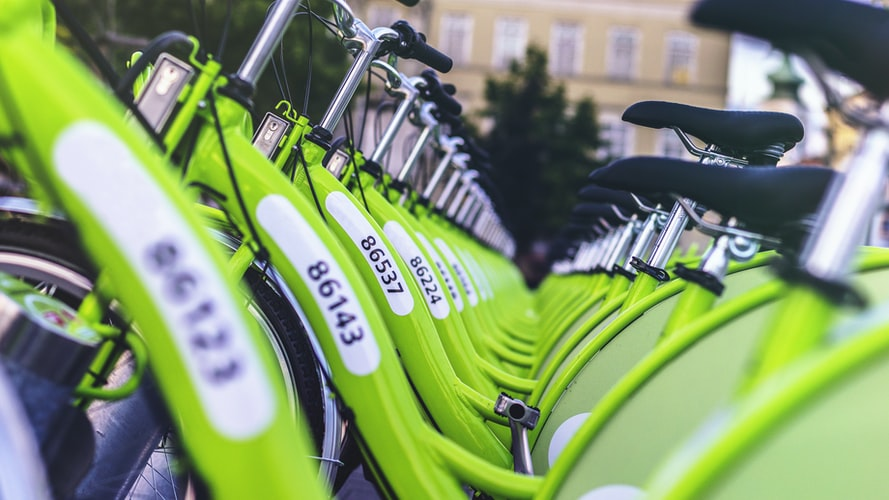

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# ***Let's Begin !***

## Importing Libraries

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [3]:
# code to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Mounting the drive and Loading Dataset

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading the dataset
working_dir = '/content/drive/MyDrive/Almabetter/Capstone Projects/Bike Sharing Demand Prediction - Anas Malik/dat/'
dataset = pd.read_csv(working_dir+'SeoulBikeData.csv', encoding='unicode_escape')

# Data Inspection

## Dataset Rows & Columns

In [5]:
# Shape of the dataset
dataset.shape

(8760, 14)

## Dataset First View

In [6]:
# Viewing the data of top 5 rows
dataset.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

## Dataset Information

In [7]:
# Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Duplicate Values


In [8]:
# Duplicated rows of Dataset
dataset.duplicated().sum()

0

## Missing Values/Null Values

In [9]:
# Missing value counts
dataset.isnull().sum().sum()

0

<Axes: >

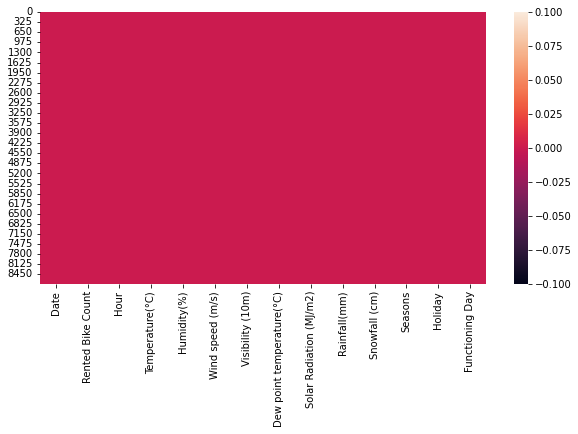

In [10]:
# Visualizing the null values by plotting heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dataset.isnull())

## What did I understand about the Dataset ?

The given dataset is a dataset of rental bikes' demand in Seoul which is the capital of South Korea.
We need to predict the bike counts required at each hour for the stable supply of rental bikes.

The given dataset has 8760 rows and 14 columns. There are no missing values and also there are no duplicated entries.

This is a one year data because in a day, there are 24 hours and 365 days in a year, 24 mupltiplied by 365 is equal to 8760.

## Understanding Variables/Features

In [11]:
# dataset columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Dataset Description
dataset.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Features Description

* **Date                :**Date of the day (dd/mm/yyyy). Type : str, need to convert into datetime.
* **Rented Bike Count             :**Number of rented bikes per hour (Dependent Variable). Type: int.
* **Hour:** Hour of the day. Type: int.
* **Temperature(°C):** Temperature (in celcius) of the day. Type: float.
* **Humidity(%):** Humidity (in percentage) of the day. Type: int.
* **Wind speed (m/s):** Speed of wind (in m/s). Type: float.
* **Visibility (10m):** Visibility(in m). Type: int.
* **Dew point temperature(°C):** Temperature(in celcius) at the beginning of day. Type: float.
* **Solar Radiation (MJ/m2):** Electromagnetic Radiation from sun. Type: float.
* **Rainfall(mm):**Raining amount(mm). Type: float.
* **Snowfall (cm):**Snowing amount(cm). Type: float.
* **Seasons:**Seasons of year. Type: str.
* **Holiday:**If day is a holiday or not. Type: str.
* **Functioning Day:**If day is a functioning day or not. Type: str.

In [13]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print(f"No. of unique values in {i} is {dataset[i].nunique()}")

No. of unique values in Date is 365
No. of unique values in Rented Bike Count is 2166
No. of unique values in Hour is 24
No. of unique values in Temperature(°C) is 546
No. of unique values in Humidity(%) is 90
No. of unique values in Wind speed (m/s) is 65
No. of unique values in Visibility (10m) is 1789
No. of unique values in Dew point temperature(°C) is 556
No. of unique values in Solar Radiation (MJ/m2) is 345
No. of unique values in Rainfall(mm) is 61
No. of unique values in Snowfall (cm) is 51
No. of unique values in Seasons is 4
No. of unique values in Holiday is 2
No. of unique values in Functioning Day is 2


# Data Wrangling

## Copy of Dataset

In [14]:
# Creating a copy of our dataset
df = dataset.copy()
df.shape

(8760, 14)

## Renaming Typical Column Names

In [15]:
# Renaming typical column names
df = df.rename(columns={
    'Rented Bike Count':'Rented_Bike_Count',
    'Temperature(°C)':'Temperature',
    'Humidity(%)':'Humidity',
    'Wind speed (m/s)':'Wind_speed',
    'Visibility (10m)':'Visibility',
    'Dew point temperature(°C)':'Dew_point_temperature',
    'Solar Radiation (MJ/m2)':'Solar_Radiation',
    'Rainfall(mm)':'Rainfall',
    'Snowfall (cm)':'Snowfall',
    'Functioning Day':'Functioning_Day'
})

In [16]:
# Checking the column names
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

## Creating Some New Columns (Feature Engineering)

In [17]:
# To get the month first we need to convert date feature into datetime
import datetime as dt

df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

In [18]:
# Date Column is converted into datetime type hence creating month and day feature 
df['Month'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day_name()

In [19]:
# Creating Weekend Column if day was a weekend day or not
df['Weekend'] = df['day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [20]:
# Dropping Date columns as there is not need of it now
df = df.drop(columns=['Date', 'day'], axis=1)

In [21]:
# Now looking how our data lookslike
df.head(5)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day     Month  Weekend  
0  No Holiday             Yes  December        0  
1  No Holiday             Yes  December        0  
2  No Holiday             Yes  December        0  
3  No Holiday             Yes  December        0  
4  No Holiday             Yes  December        0

# Exploratory Data Analysis

**What is EDA?**
* ***Exploratory Data Analysis (EDA) is one of the techniques used for extracting vital features and trends used by machine learning and deep learning models.***

**Why we perform EDA?**
* ***We need to perform EDA to get prior understanding of given data before making any assumptions. It also helps us to understand the relationship between dependent and independent variables.***

## Univariate Analysis

**It is a type of analysis where we visualize one variable at one time.**

In [22]:
# creating a variable holding all the numerical features
numerical_features = df.select_dtypes(include=['int32', 'int64', 'float64', 'float32']).columns
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Weekend'],
      dtype='object')

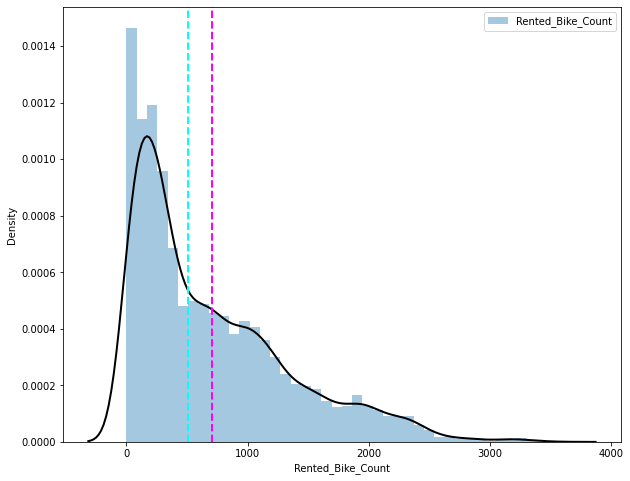

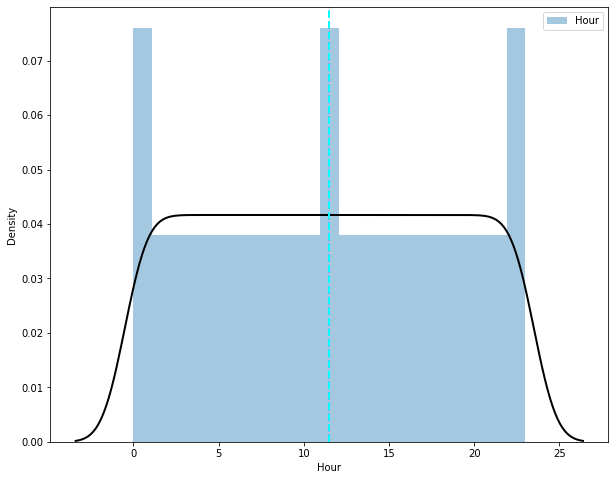

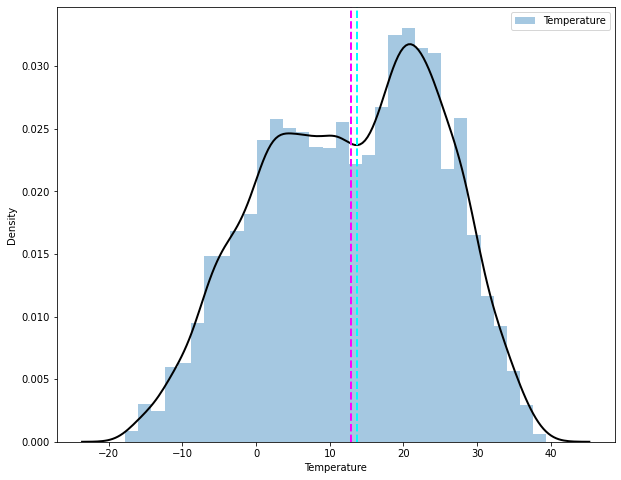

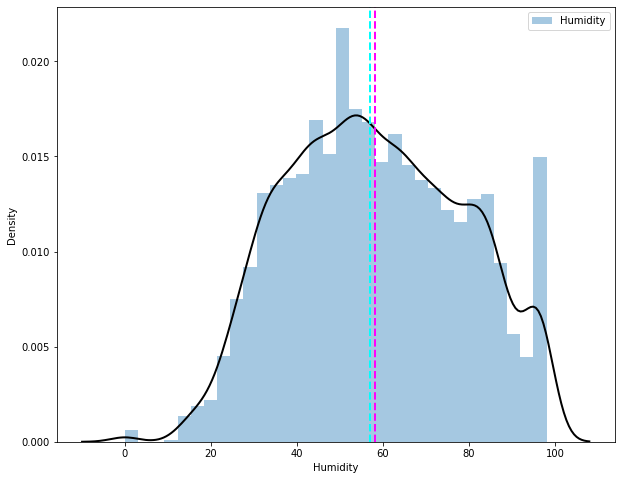

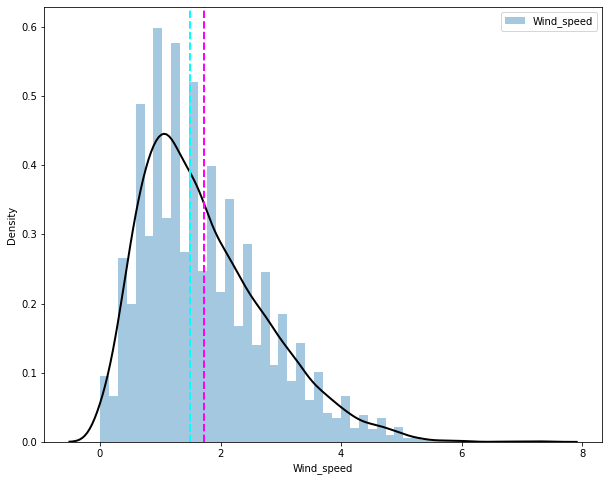

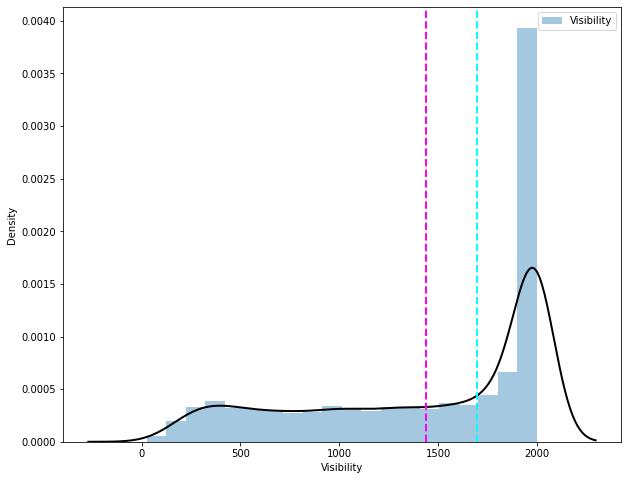

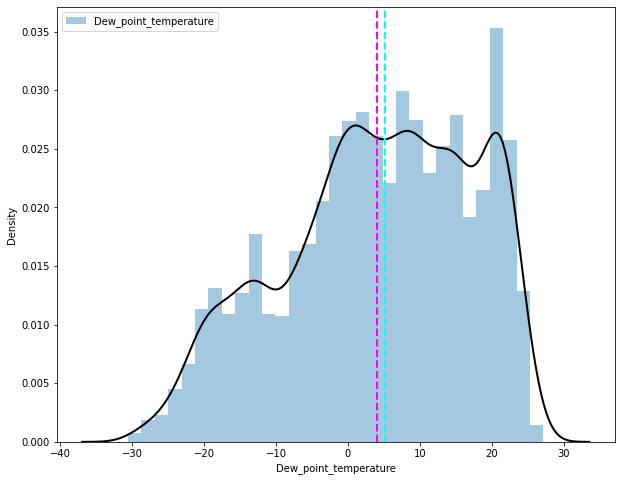

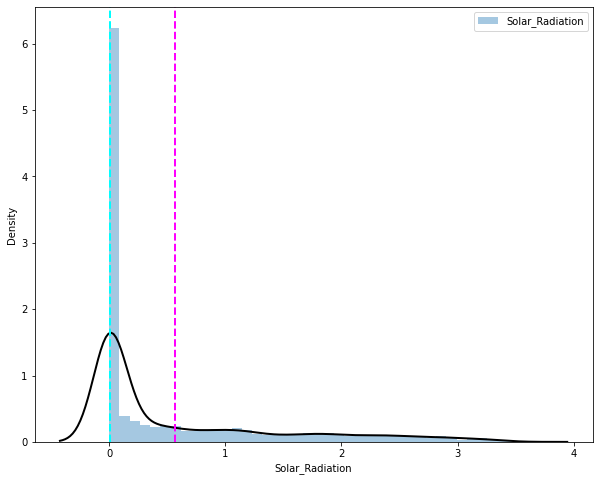

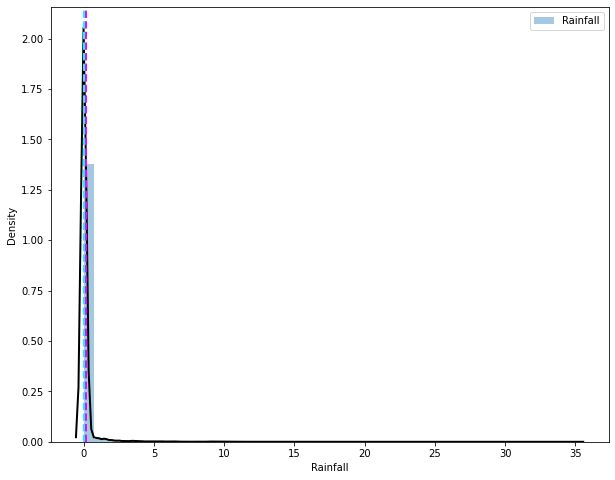

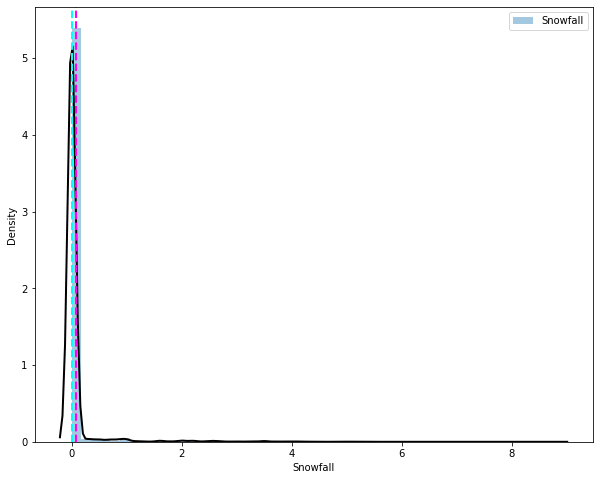

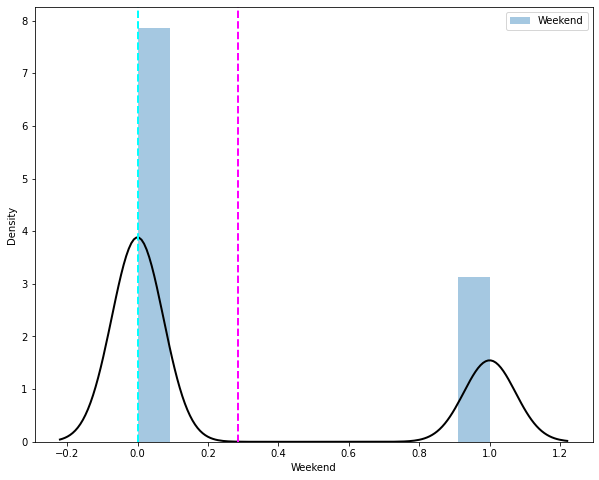

In [23]:
# Visualizing the distribution of all numerical columns
for i, var in enumerate(numerical_features):
  fig = plt.figure(figsize=(10, 8))
  axis = fig.gca()
  sns.distplot(df[var], kde_kws={'linewidth': 2, 'color': 'black'}, label=var)
  axis.axvline(df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
  axis.axvline(df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.xlabel(var)
  plt.ylabel("Density")
  plt.legend()

**Some Conculsion about distribution of Numerical Columns**


*   **Rented_Bike_Count**: More number of records are in between **0-500**. Positive Skewed distribution.
*   **Temperature**: More Records are in between **15-30**. Somehow Normally distributed.
*   **Humidity**: More records are in between **40-80**. Somehow normally distributed.
*   **Wind_speed**: More records are in between **1-2**. Positively Skewed.
*   **Visibility**: More records are in between **1800-2200**. Negatively Skewed.
*   **Dew_point_temperature**: More records are in between **0-20**. Slightly negatively skewed.
*   **Solar_Radiation**: More records are in between **0-0.5**. Positively Skewed.
*   **Rainfall**: More records are around **0**. Positively Skewed.
*   **Snowfall**: More records are around **0**. Positively Skewed.
*   **Weekend**: Only two records 0 and 1. More records are 0.




In [24]:
# Creating a variable holding all categorical column names
categorical_features = df.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day', 'Month'], dtype='object')

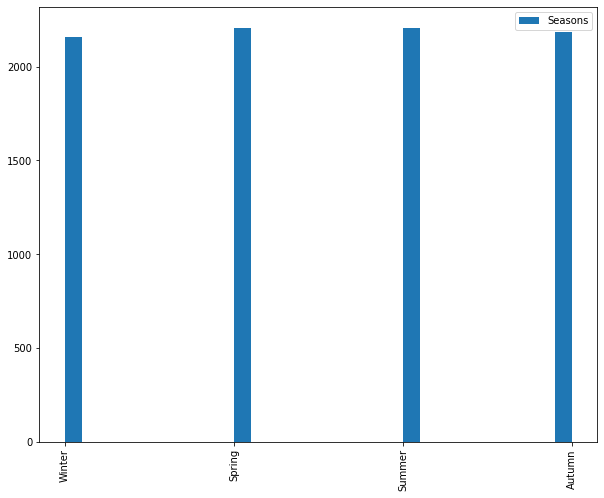

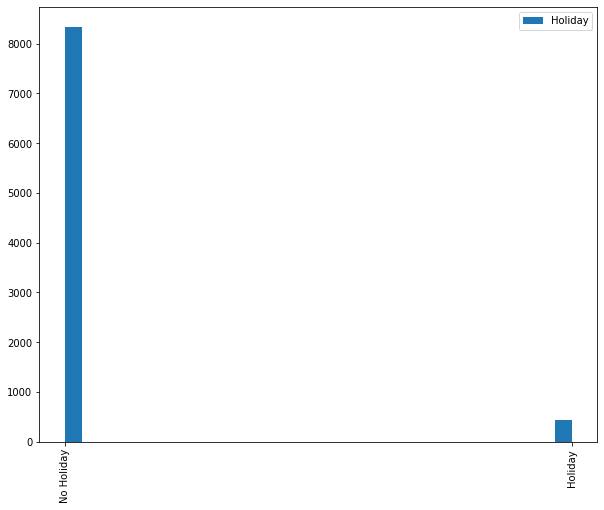

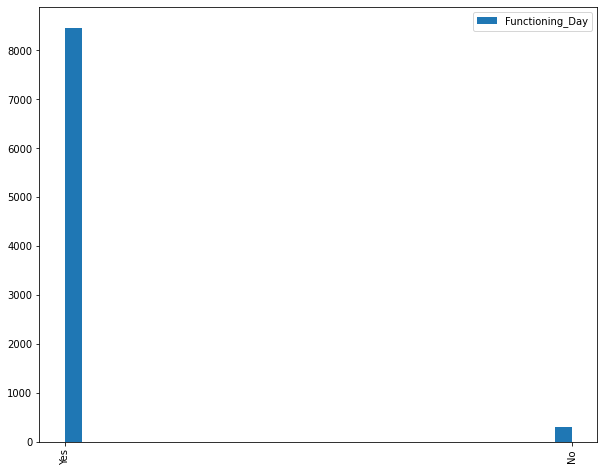

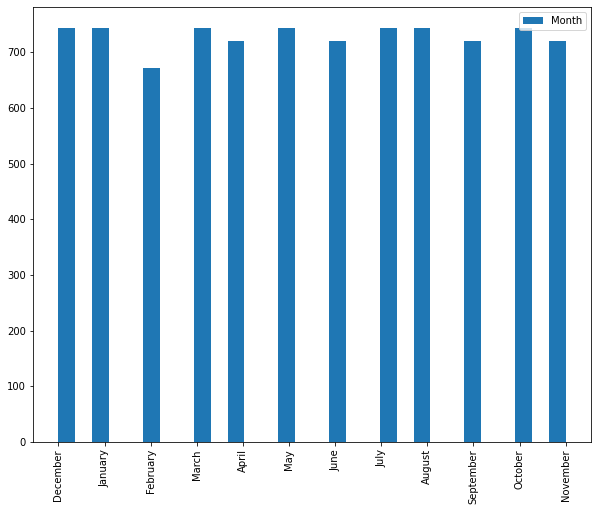

In [25]:
# Visualizing histigrams of all categorical unique value counts
for i, var in enumerate(categorical_features):
  plt.figure(figsize=(10, 8))
  plt.hist(df[var], label=var, bins=30)
  plt.legend()
  plt.xticks(rotation=90)

**Some conclusion about unique value counts of categorical features**


*   **Seasons**: There are four unique values ,i.e., Winter, Spring, Summer, Autumn. All of them have somehow equal number of records. This means people prefer renting bikes in all seasons.
*   **Holidays**: There are only two unique values ,i.e., No Holiday, Holiday. No Holiday have high number of records which means people prefer to rent bike when they have some work and prefer to not rent bike when there is holiday.
*   **Functioning_Day**: This is similar to Holidays columns and same conclusion can be make for this ,i.e.. people rent bike when it is a functioning day.
*   **Month**: This have 12 unique values and all of them have records. February have lowest records. This columns represents the months in a year.



## Bivariate Analysis

**It is a type of analysis where we visualize two variables at one time**

Text(0, 0.5, 'Number of bikes rented')

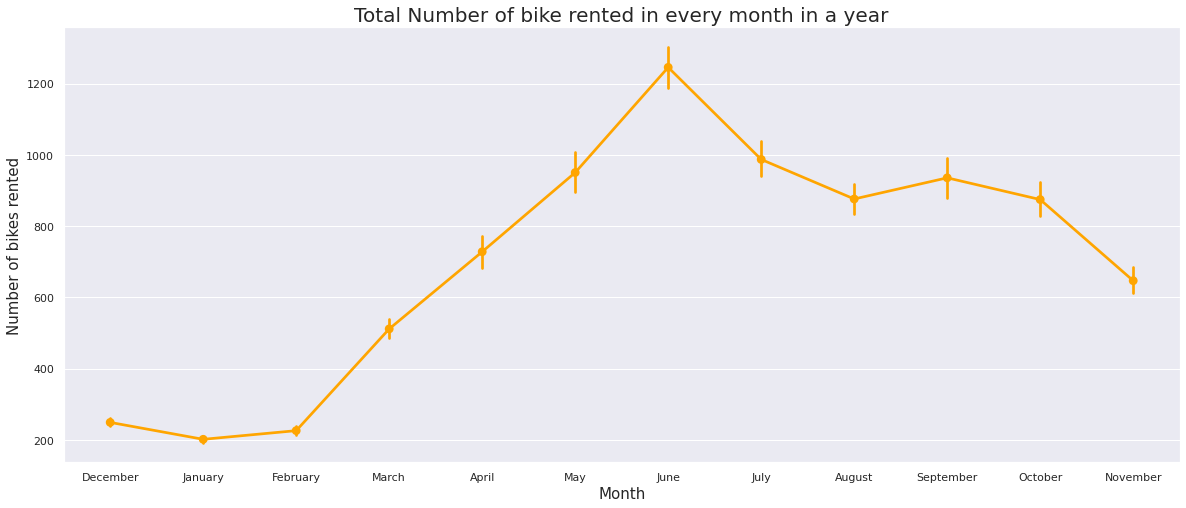

In [26]:
# Visualizing the pointplot btween rented bike count and months
plt.figure(figsize=(20, 8))
sns.set()
sns.pointplot(data=df, x='Month', y='Rented_Bike_Count', color='orange')
plt.title("Total Number of bike rented in every month in a year", size=20)
plt.xlabel("Month", size=15)
plt.ylabel("Number of bikes rented", size=15)

**As we can see the graph, we can conclude that, the renting of bike increses when summer season starts(March) and starts decresing when summer season ends(september).**

In [27]:
# Creating a dataframe by grouping on Seasons to get unique seasons and sum over the rented bikes to get total renting
seasons_df = df.groupby('Seasons')['Rented_Bike_Count'].sum().reset_index()

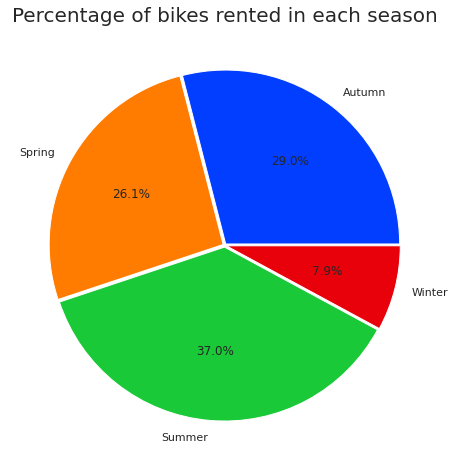

In [28]:
# plotting a pie chart to visualize the percentage of renting a bike in every season
seasons = list(seasons_df['Seasons'])
bike_counting = list(seasons_df['Rented_Bike_Count'])

plt.figure(figsize=(8, 8))
explode = [0.01, 0.01, 0.01, 0.01]
plt.pie(bike_counting, labels=seasons, autopct='%1.1f%%', explode=explode, colors=sns.color_palette('bright'))
plt.title("Percentage of bikes rented in each season", size=20)
plt.show()

**From Pie chart, we can conclude that during summer, Spring and Autumn seasons people prefer to rent bikes and in winters less number of people prefer to rent bikes.**


*   **Summer**: 37 %
*   **Winter**: 7.9 %
*   **Spring**: 26.1 %
*   **Autumn**: 29 %



In [29]:
# Creating a dataframe by grouping on temaperature and taking mean of it and extracting Rented_Bike_Count
temp_df = df.groupby('Temperature').mean()['Rented_Bike_Count'].reset_index()

Text(0, 0.5, 'Number of Bikes Rented')

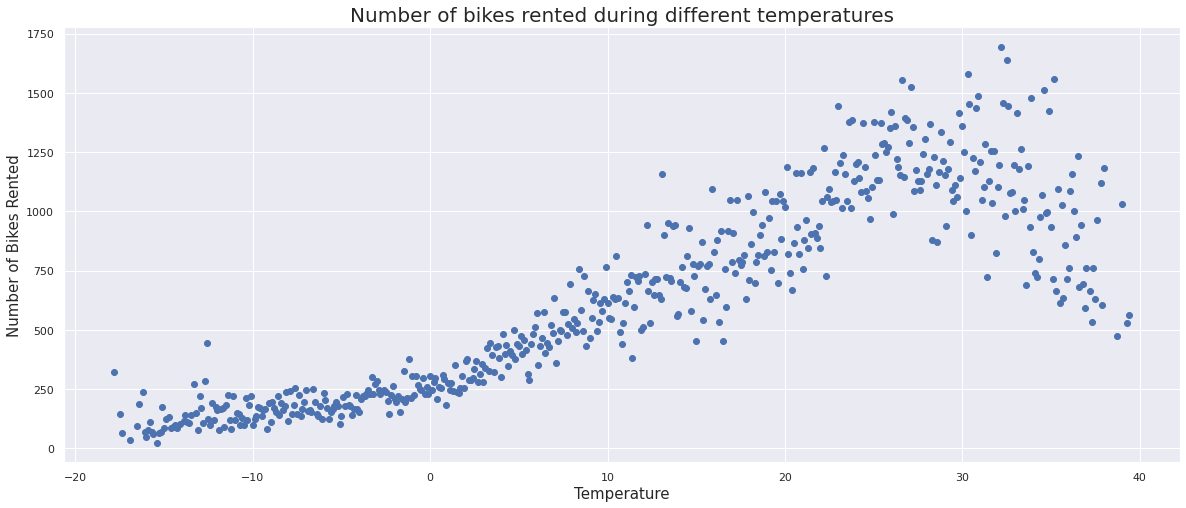

In [30]:
# Visualizing scatter plot between temperature and number of bikes rented
sns.set()
plt.figure(figsize=(20, 8))
plt.scatter(temp_df['Temperature'], temp_df['Rented_Bike_Count'])
plt.title("Number of bikes rented during different temperatures", size=20)
plt.xlabel("Temperature", size=15)
plt.ylabel("Number of Bikes Rented", size=15)

**From above graph we can conclude that:**

*   **When temperature is too cold(below 0 degree), less number of bikes rented by the people**
*   **When temperature is too hot(above 40), noone opted to rent bike.**
*   **More number of people prefer to rent a bike when temperature is moderate(between 20-30 degree).**



In [31]:
# creating a dataframe for humidity percent and rented_bike_count
hum_df = df.groupby('Humidity')['Rented_Bike_Count'].sum().reset_index()

Text(0, 0.5, 'Number of Bikes Rented')

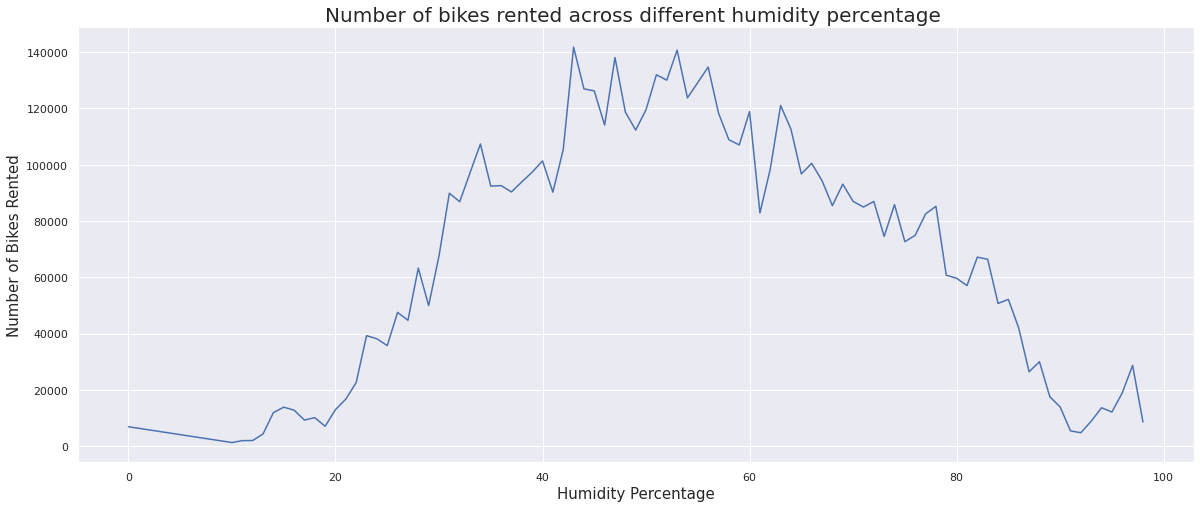

In [32]:
# Visualizing the line graph to see in which humidity percent, people prefer to rent a bike
sns.set()
plt.figure(figsize=(20, 8))
plt.plot(hum_df['Humidity'], hum_df['Rented_Bike_Count'])
plt.title("Number of bikes rented across different humidity percentage ", size=20)
plt.xlabel("Humidity Percentage", size=15)
plt.ylabel("Number of Bikes Rented", size=15)

**From above graph we can see that, more number of bikes are rented when humidity present in air is between 30 to 70 percent.**

In [33]:
# Creating a dataframe by grouping on Rainfall and extracting Rented_Bike_Count
rain_df = df.groupby("Rainfall").mean()['Rented_Bike_Count'].reset_index()

Text(0, 0.5, 'Number of Bikes Rented')

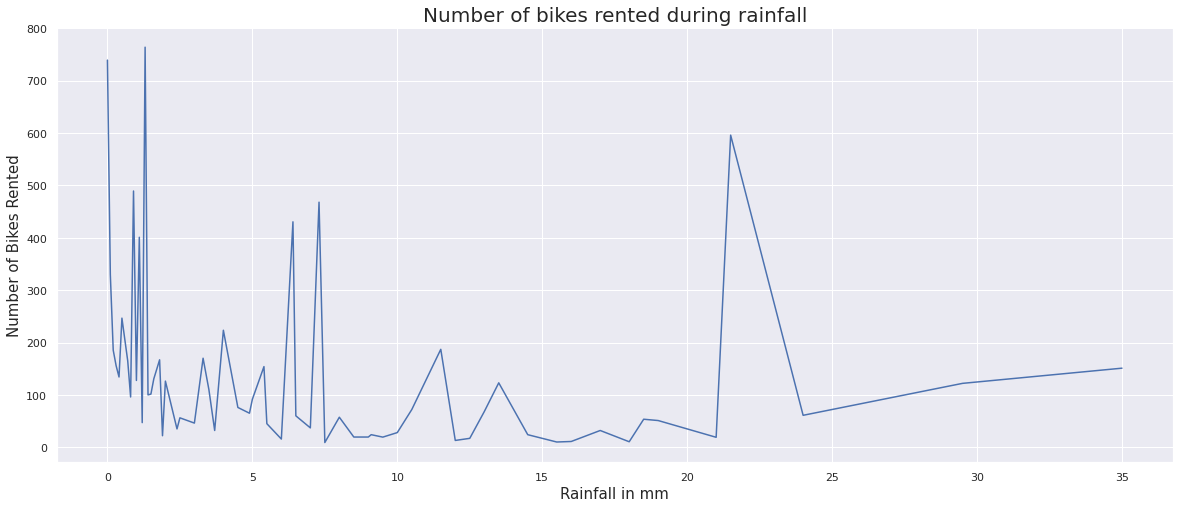

In [34]:
# plotting a line plot to visualize people rent a bike during rainfall or not
sns.set()
plt.figure(figsize=(20, 8))
plt.plot(rain_df['Rainfall'], rain_df['Rented_Bike_Count'])
plt.title("Number of bikes rented during rainfall", size=20)
plt.xlabel("Rainfall in mm", size=15)
plt.ylabel("Number of Bikes Rented", size=15)

**Renting a bike is not affected that much during rainfall because we can see from graph that people had rented bike when it is raining 20-25mm.**

In [35]:
# Creating a dataframe by grouping on Snowfall and extracting Rented_Bike_Count
snow_df = df.groupby("Snowfall").mean()['Rented_Bike_Count'].reset_index()

Text(0, 0.5, 'Number of Bikes Rented')

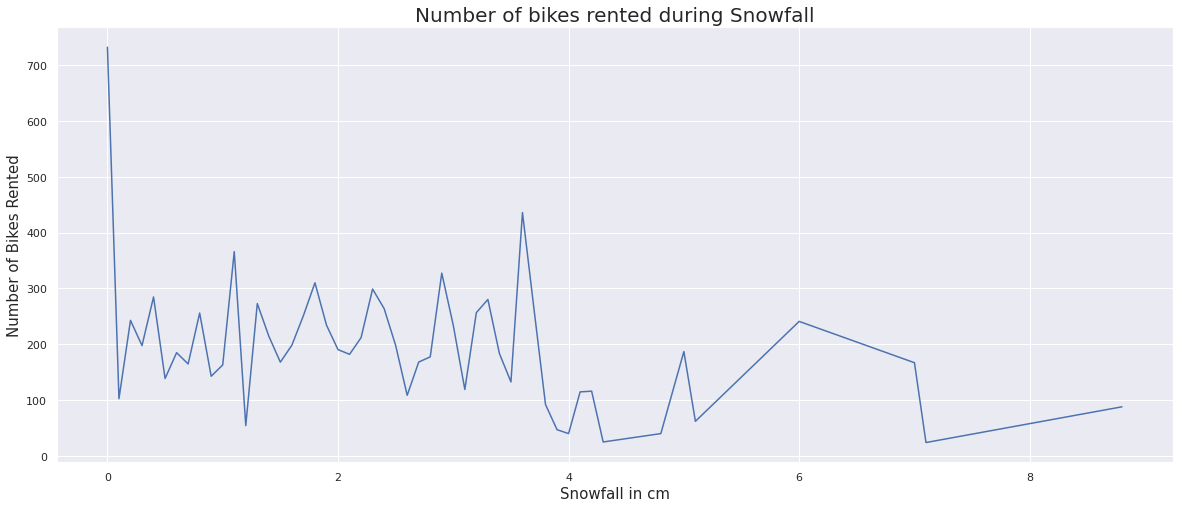

In [36]:
# plotting a line plot to visualize people rent a bike during rainfall or not
sns.set()
plt.figure(figsize=(20, 8))
plt.plot(snow_df['Snowfall'], snow_df['Rented_Bike_Count'])
plt.title("Number of bikes rented during Snowfall", size=20)
plt.xlabel("Snowfall in cm", size=15)
plt.ylabel("Number of Bikes Rented", size=15)

**As we can see, when there is snowfall more than 4cm, few people rent a bike.**
**But when snowfall is less than 4cm, people still prefer to rent a bike.**

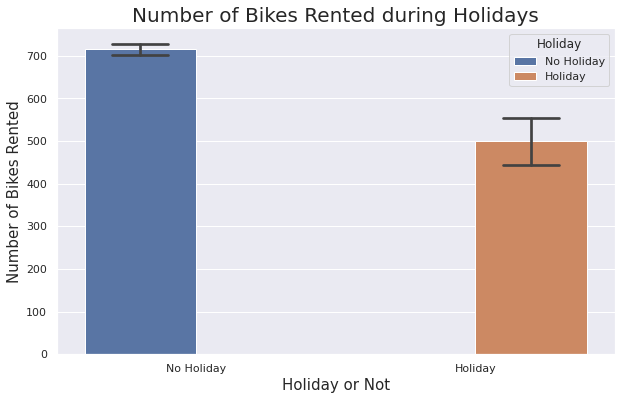

In [37]:
# plotting a bar plot to visualize which days people rent a bike
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Holiday', y='Rented_Bike_Count', hue='Holiday', capsize=0.2)
plt.title("Number of Bikes Rented during Holidays", size=20)
plt.xlabel('Holiday or Not', size=15)
plt.ylabel("Number of Bikes Rented", size=15)
plt.show()

**For Columns - Holiday, Functioning_Day, Weekend**

**We can conclude that, chances of renting a bike increses when there is no holiday or we can say it is a functioning day and when there is a weekend or holiday, less number of people rent a bike.**

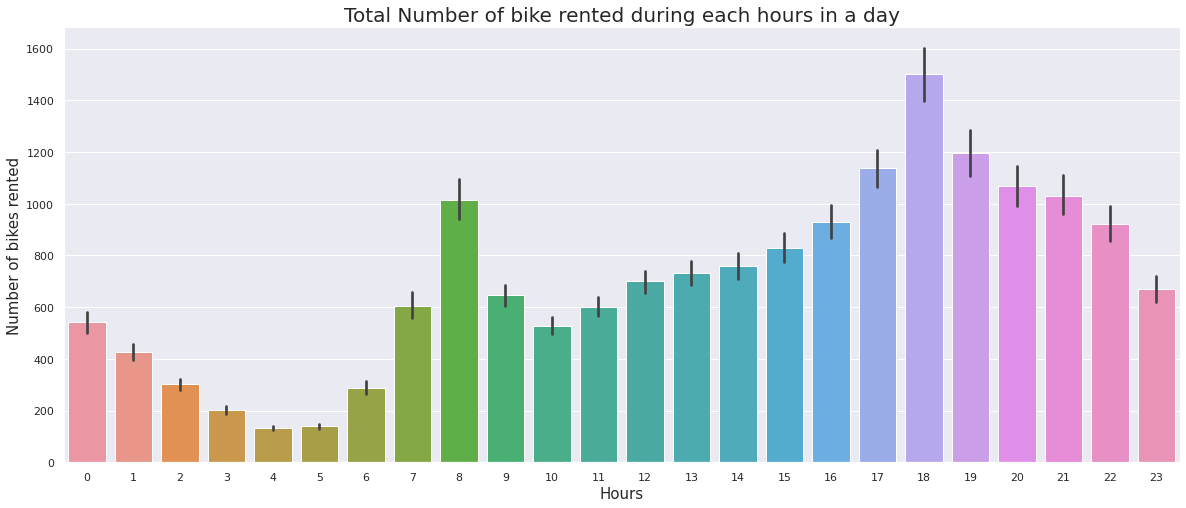

In [38]:
# Visualizing the pointplot between rented bike count during each hour in a day
plt.figure(figsize=(20, 8))
sns.set()
sns.barplot(data=df, x='Hour', y='Rented_Bike_Count')
plt.title("Total Number of bike rented during each hours in a day", size=20)
plt.xlabel("Hours", size=15)
plt.ylabel("Number of bikes rented", size=15)
plt.show()

**From the above graph, we can conclude - more people rent a bike during daytime.**


*   **In Morning, people rent a bike around 7AM to 9AM, maybe while going to their work.**
*   **In Evening, people rent a bike around 5PM to 7Pm, maybe while returning from their office.**



## Multivariate Analysis

**It is a type of analysis where we analyse more than two variables at one time.**

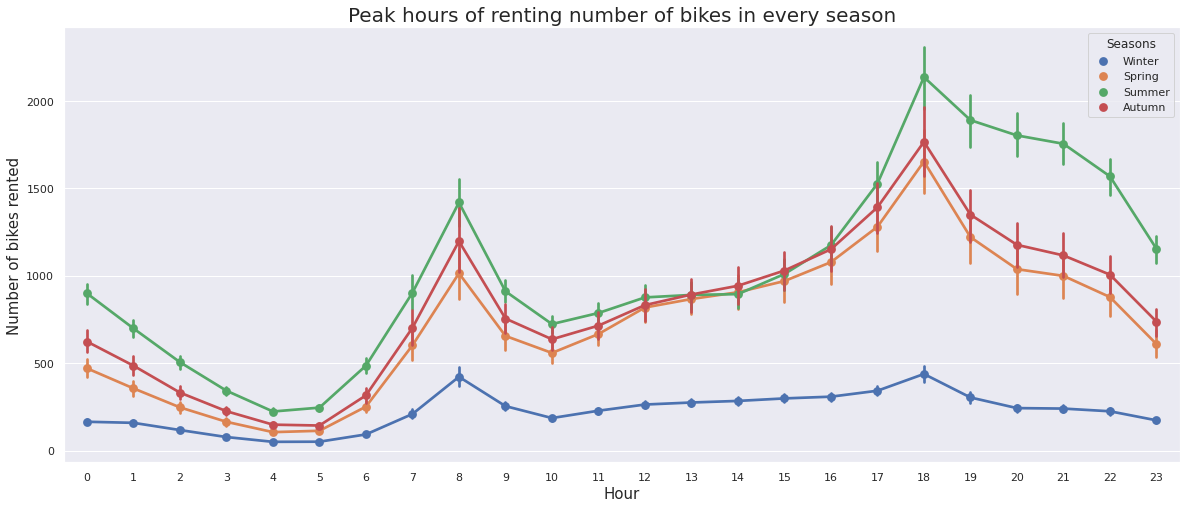

In [39]:
# Plotting a pointplot to analyse the peak hour of renting bikes in every season
plt.figure(figsize=(20, 8))
sns.set()
sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue='Seasons')
plt.title("Peak hours of renting number of bikes in every season", size=20)
plt.xlabel("Hour", size=15)
plt.ylabel("Number of bikes rented", size=15)
plt.show()

**We can conclude that :**

*   **People rent more number of bikes in summer season,  because of sunny days.**

*   **People rent less number of bikes in winter season, maybe because of snowfall.**

*   **In every season, the peak of renting bikes is around 8AM in the morning and 6PM in evening.**



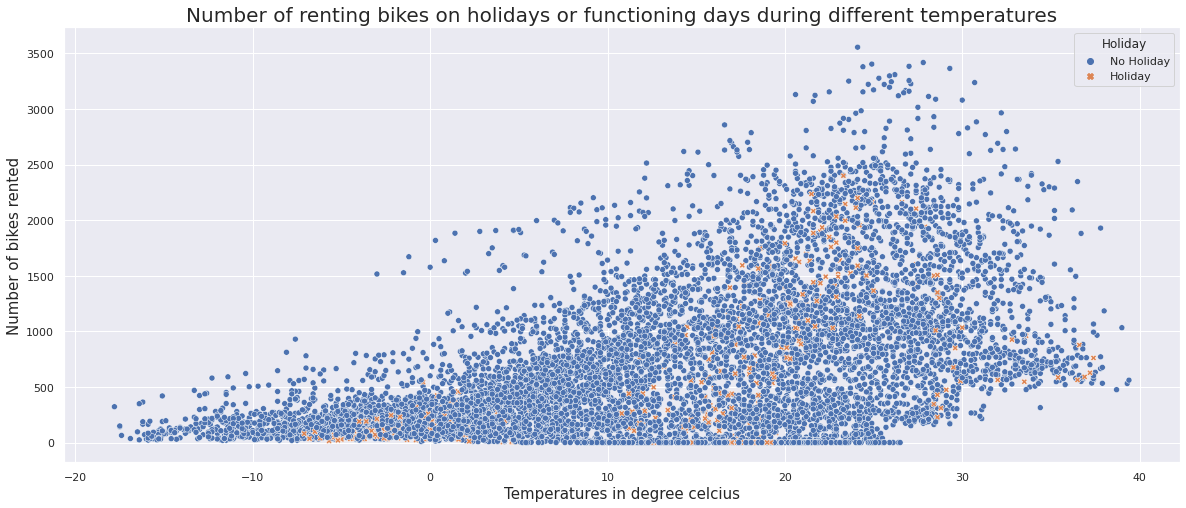

In [40]:
# Plotting a scatterplot to analyse number of renting bikes during different temperatures when there is holiday or fuctioning day
plt.figure(figsize=(20, 8))
sns.set()
sns.scatterplot(data=df, x='Temperature', y='Rented_Bike_Count', hue='Holiday', style="Holiday")
plt.title("Number of renting bikes on holidays or functioning days during different temperatures", size=20)
plt.xlabel("Temperatures in degree celcius", size=15)
plt.ylabel("Number of bikes rented", size=15)
plt.show()

**From above graph, we can conclude that :**

*   **More number of bikes are rented when temperature is in between 10 degree and 30 degree celcius.**
*   **There are very few people who rent bikes during holidays.**
*   **More number of bikes are rented on functioning days no matter what is the temperature of the day.**



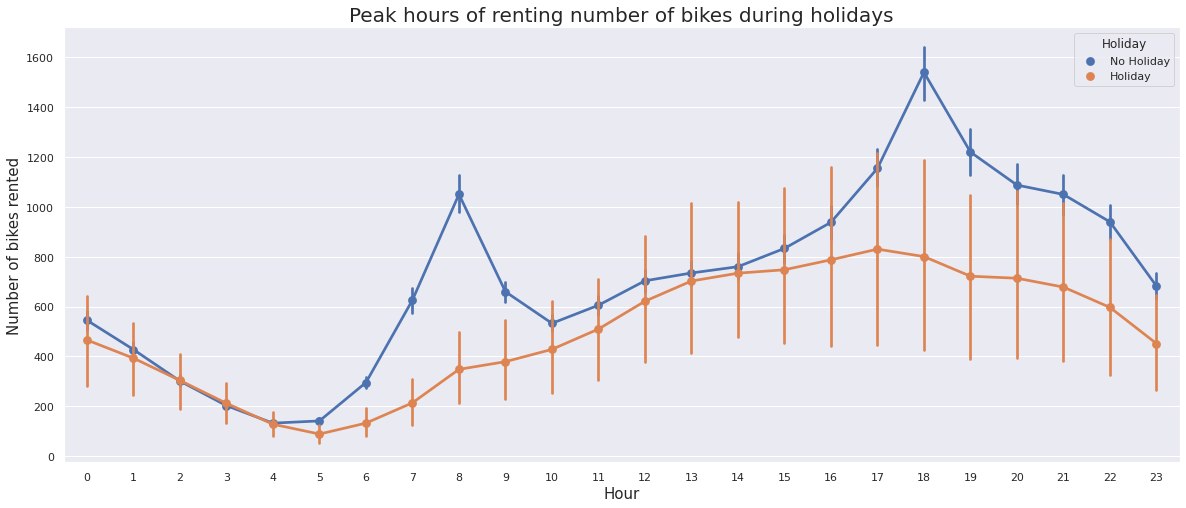

In [41]:
# plotting a pointplot to analyse peak hours of renting bikes when there is holiday ot functioning day
plt.figure(figsize=(20, 8))
sns.set()
sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue='Holiday')
plt.title("Peak hours of renting number of bikes during holidays", size=20)
plt.xlabel("Hour", size=15)
plt.ylabel("Number of bikes rented", size=15)
plt.show()

**When there is no holidays, more number of bikes are rented around 8AM and 6PM.**

**When there is a holiday, people rent a bike from 2PM to 8PM.**

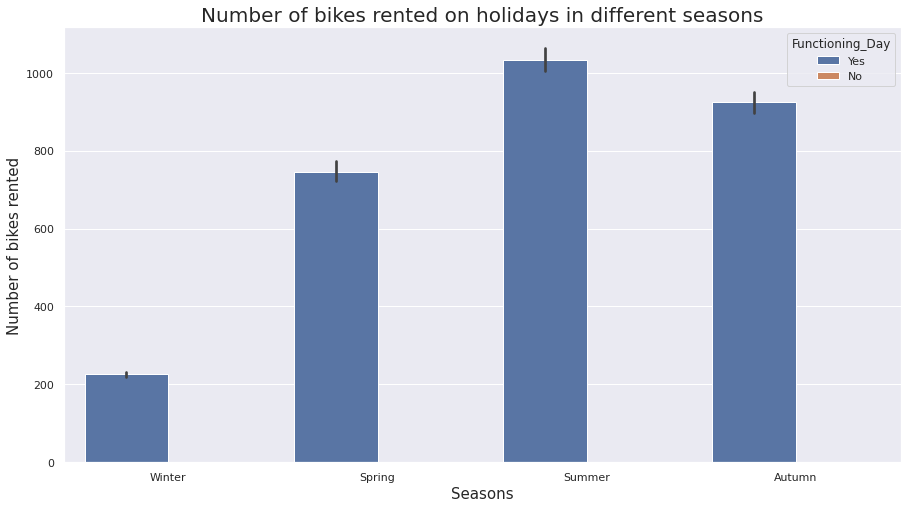

In [42]:
# plotting a barplot to visualize which season have highest number of rented bikes when there is functioning day
plt.figure(figsize=(15, 8))
sns.set()
sns.barplot(data=df, x='Seasons', y='Rented_Bike_Count', hue='Functioning_Day')
plt.title("Number of bikes rented on holidays in different seasons", size=20)
plt.xlabel("Seasons", size=15)
plt.ylabel("Number of bikes rented", size=15)
plt.show()

**More number of bikes are rented in summer, Autumn and Spring season.**

**During all seasons, people rent bike when it is a functioning day.**

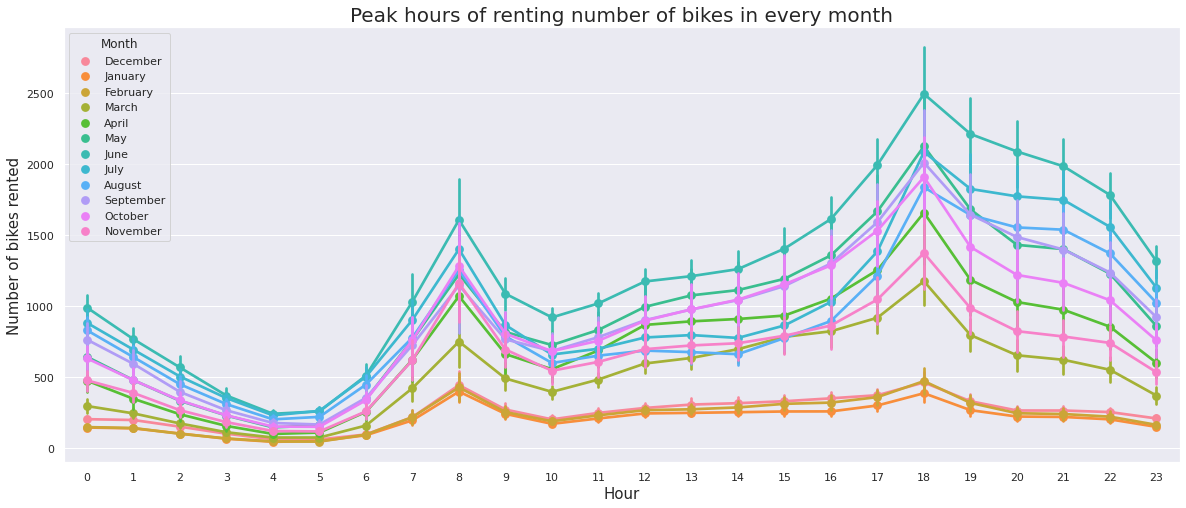

In [43]:
plt.figure(figsize=(20, 8))
sns.set()
sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue='Month')
plt.title("Peak hours of renting number of bikes in every month", size=20)
plt.xlabel("Hour", size=15)
plt.ylabel("Number of bikes rented", size=15)
plt.show()

**More number of bikes are rented in summer season - May, June, July**

**Less number of bikes are rented in winter season - December, January**

## Linear Relationship Between Variables

**What is Regression Plot ?**

**Regression Plot is a type of plot in seaborn library which help us to find linear relationship between two variables by plotting aregression line.**

In [44]:
# Separating all independent numerical column names
numerical_independent_features = list(set(df.select_dtypes(include=['int64', 'float64']).keys()) - {'Rented_Bike_Count'})
numerical_independent_features

['Weekend',
 'Humidity',
 'Solar_Radiation',
 'Rainfall',
 'Temperature',
 'Hour',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Snowfall']

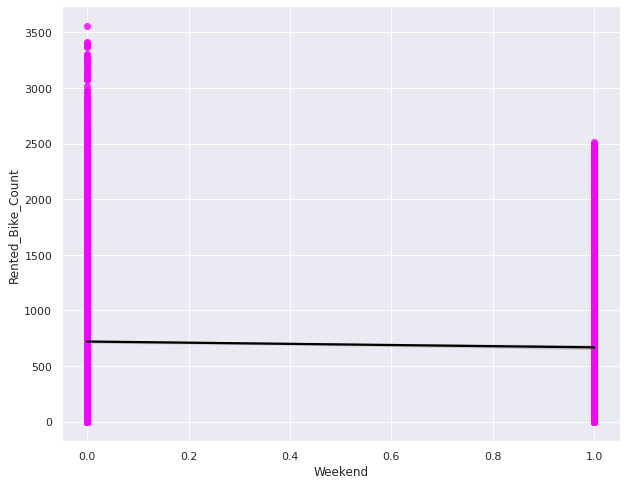

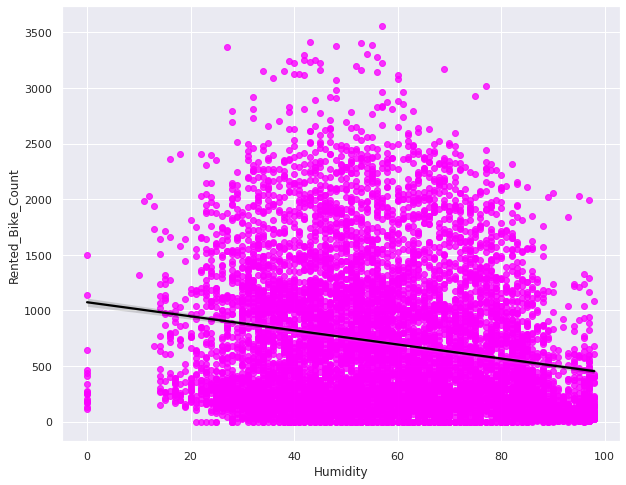

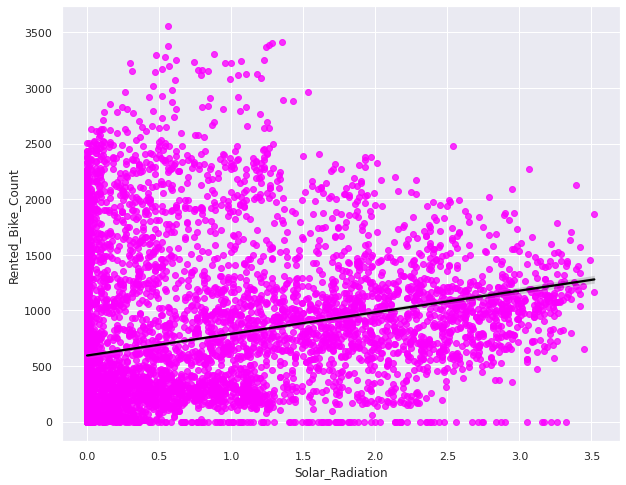

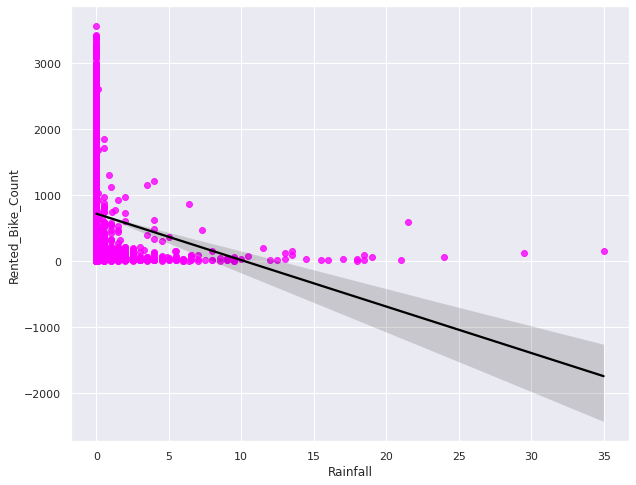

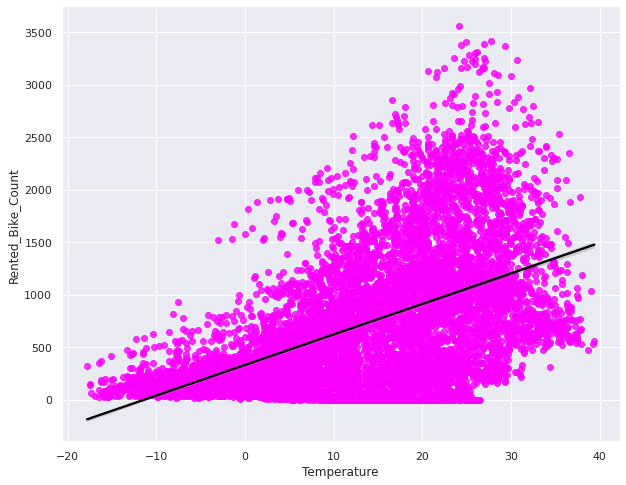

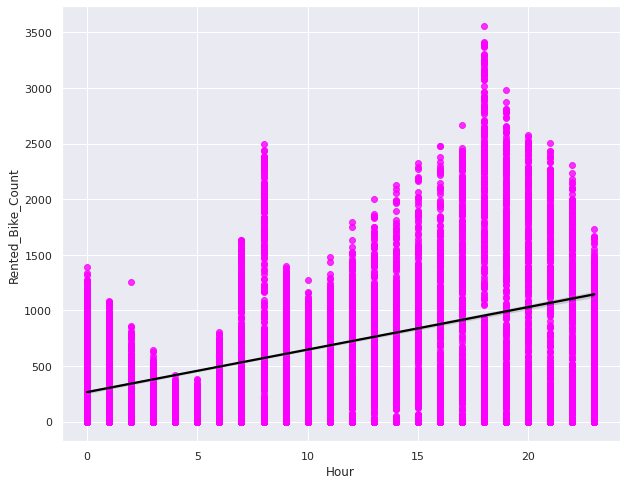

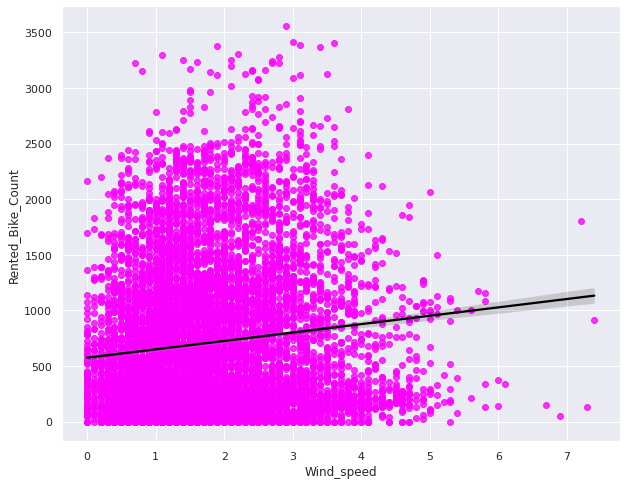

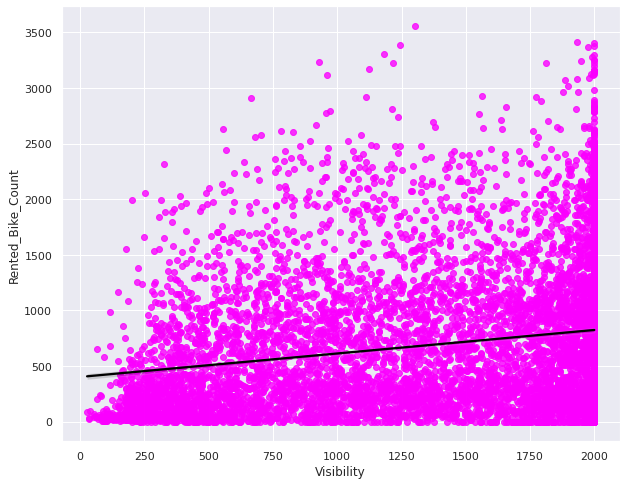

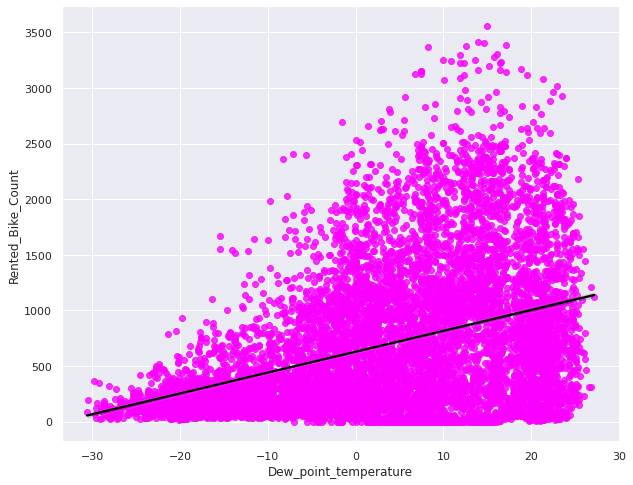

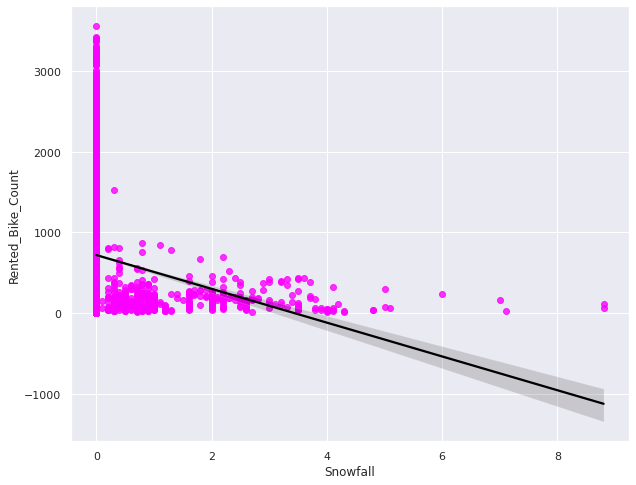

In [45]:
# visualizing the linear relationship between numerical features by plotting regression plot
for i, var in enumerate(numerical_independent_features):
  fig,ax = plt.subplots(figsize=(10, 8))
  sns.regplot(x=df[var], y=df['Rented_Bike_Count'], scatter_kws={'color': '#FB00FF'}, line_kws={'color': 'black'})

**From the above regression plot, I am dividing columns into two parts :**

1.   **Positively Related to Target Variable :- Target variable increses on incresing the below variables.**

*   Solar_Radiation
*   Hour
*   Visibility
*   Wind_speed
*   Temperature
*   Dew_point_temperature


2.   **Negatively Related to Target Variable :- Target variable decreases on incresing below variables.**

*   Rainfall
*   Humidity
*   Weekend
*   Snowfall





# Data Pre-processing

## Visualizing the distribution of target variable

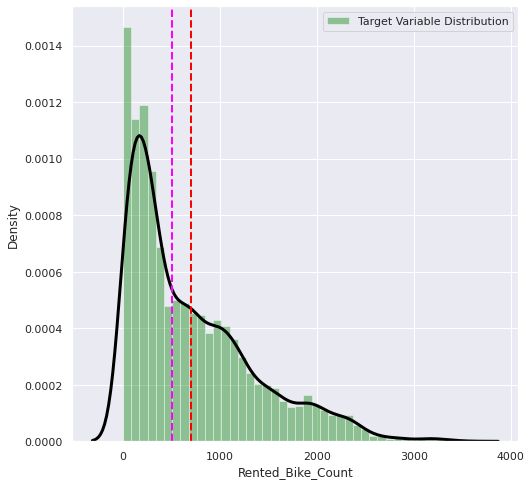

In [46]:
# plotting the distribution plot to visualize the distribution of target variable
sns.set()
plt.figure(figsize=(8, 8))
ax=sns.distplot(df['Rented_Bike_Count'], color='green', kde_kws={'linewidth': 3, 'color': 'black'}, label='Target Variable Distribution')
ax.axvline(df['Rented_Bike_Count'].mean(), linestyle='dashed', linewidth=2, color='red')
ax.axvline(df['Rented_Bike_Count'].median(), linestyle='dashed', linewidth=2, color='magenta')
plt.legend()
plt.show()

**From above graph we can see that the target variable is right skewed and the assumption of Linear Regression algorithm is that the target variable should be normally distributed. Therefore, some transformation is required to make the distribution of target variable normal.**

**There are three types of tranformation we can apply to make it normal :**

1.   Log-Tranformation
2.   Square Root Transformation
3.   Inverse Tranformation



**There might be some outliers present in our target varaible. So first plotting a boxplot to detect outliers.**

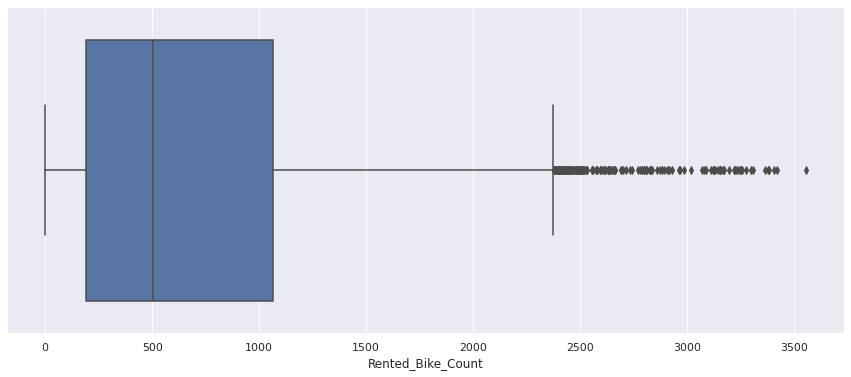

In [47]:
# plotting a boxplot to detect outliers
sns.set()
plt.figure(figsize=(15, 6))
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

**As we can see that there are outliers present in the data which affecting the distribution.**

## Normalizing the Target Variable

**What is Normalization ?**
**It is a technique used in data preprocessing. The goal of normalization is to minimze and exclude duplicate data.**

### Applying log tranformation

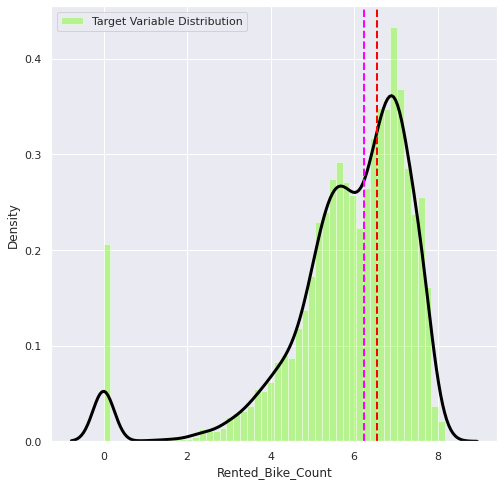

In [48]:
# Applying log tranformation
sns.set()
plt.figure(figsize=(8, 8))
ax=sns.distplot(np.log1p(df['Rented_Bike_Count']), color='#6CFF00', kde_kws={'linewidth': 3, 'color': 'black'}, label='Target Variable Distribution')
ax.axvline(np.log1p(df['Rented_Bike_Count'].mean()), linestyle='dashed', linewidth=2, color='red')
ax.axvline(np.log1p(df['Rented_Bike_Count'].median()), linestyle='dashed', linewidth=2, color='magenta')
plt.legend()
plt.show()

**Log Tranformation make of distribution left skewed. Now we will apply square root tranformation.**

### Applying Square Root tranformation

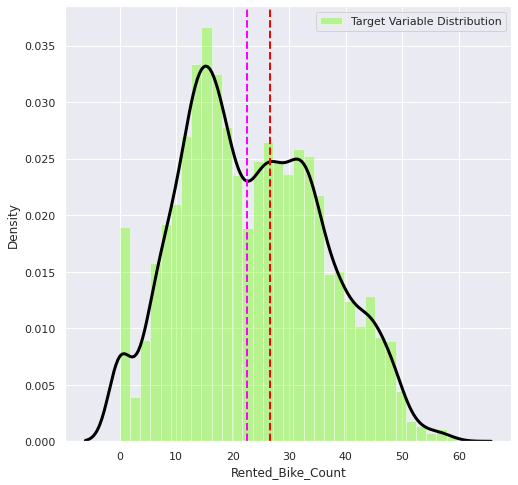

In [49]:
# Applying Square Root Tranformation
sns.set()
plt.figure(figsize=(8, 8))
ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color='#6CFF00', kde_kws={'linewidth': 3, 'color': 'black'}, label='Target Variable Distribution', hist=True)
ax.axvline(np.sqrt(df['Rented_Bike_Count'].mean()), linestyle='dashed', linewidth=2, color='red')
ax.axvline(np.sqrt(df['Rented_Bike_Count'].median()), linestyle='dashed', linewidth=2, color='magenta')
plt.legend()
plt.show()

**As we can see that the distribution of target variable is now almost normally distributed.**

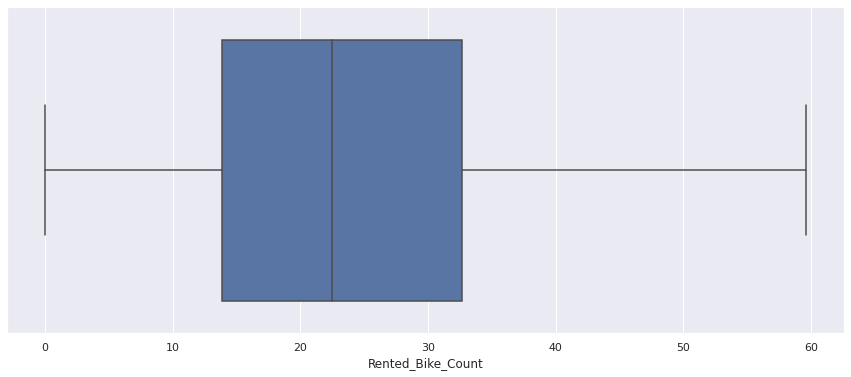

In [50]:
# Now plotting a boxplot to detect outliers
sns.set()
plt.figure(figsize=(15, 6))
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

**After aplying Square Root Tranformation, we can see that there is not outlier present.**

## Correlation Between variables

<Axes: >

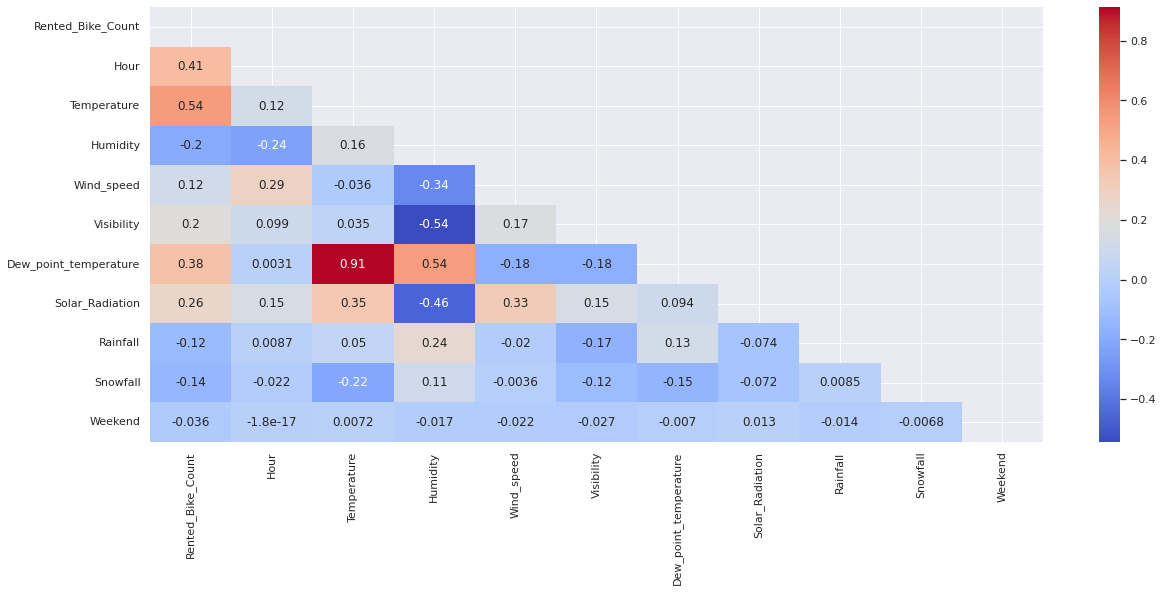

In [51]:
# Creating a correlation matrix and then plotting a heatmap to visualize the correlation between variables
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')

**From the above heatmap we can see that Dew_point_temperature is highly correlated with Temperature. So we can remove either one of them. I decided to remove Dew_point_temperature because I don't think people choose to rent a bike after observing morning temperature.**

## Removing Multicollinearity

**What is Multicollinearity ?**

Multicollinearity occurs when two or more independent variables are highly correlated with each other. If it is present between our independent variables than it affect our regression model accuracy.

**What is VIF ?**

It stands for Variance Inflation Factor. It helps us to remove multicollinearity. 

In [52]:
# creating a variable holding names of all independet numeriacl columns
num_ind_cols = list(set(df.select_dtypes(include=['int64', 'float64']).columns)- {'Rented_Bike_Count'})
num_ind_cols

['Weekend',
 'Humidity',
 'Solar_Radiation',
 'Rainfall',
 'Temperature',
 'Hour',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Snowfall']

In [53]:
# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# creating a function to return dataframe with VIF values
def calculate_vif(X):
  '''
  This function returns the value of VIF
  '''
  dataframe = pd.DataFrame()
  dataframe['Columns'] = X.columns
  dataframe['VIF_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return dataframe

In [57]:
# calculating the VIF for numerical independent variables
calculate_vif(df[num_ind_cols])

Columns  VIF_value
0                Weekend   1.409388
1               Humidity   5.617480
2        Solar_Radiation   2.882383
3               Rainfall   1.081868
4            Temperature  33.984042
5                   Hour   4.418398
6             Wind_speed   4.809775
7             Visibility   9.106191
8  Dew_point_temperature  17.505235
9               Snowfall   1.120882

We can see the same result shown by heatmap. VIF value for Temperature and Dew_point_temperature is high, hence we are removing Dew_point_temperature.

In [58]:
# Removing Dew_point_temperature from columns list
num_ind_cols = list(set(num_ind_cols) - {'Dew_point_temperature'})
num_ind_cols

['Humidity',
 'Solar_Radiation',
 'Rainfall',
 'Visibility',
 'Temperature',
 'Hour',
 'Wind_speed',
 'Weekend',
 'Snowfall']

In [59]:
# Now again calculating the vif value
calculate_vif(df[num_ind_cols])

Columns  VIF_value
0         Humidity   5.016930
1  Solar_Radiation   2.254781
2         Rainfall   1.079752
3       Visibility   4.738121
4      Temperature   3.230140
5             Hour   3.930173
6       Wind_speed   4.608625
7          Weekend   1.378871
8         Snowfall   1.120665

As we can see we have removed multicollinearity by droping Dew_point_temperature.

In [60]:
# Dropping Dew_point_temperature from dataframe
df = df.drop(columns=['Dew_point_temperature'], axis=1)
df.shape

(8760, 14)

In [61]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day', 'Month', 'Weekend'],
      dtype='object')

## Feature Encoding

As we know that to train a Machine Learning model we need to encode every categorical data in numbers.

In [62]:
df.head(2)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   

   Solar_Radiation  Rainfall  Snowfall Seasons     Holiday Functioning_Day  \
0              0.0       0.0       0.0  Winter  No Holiday             Yes   
1              0.0       0.0       0.0  Winter  No Holiday             Yes   

      Month  Weekend  
0  December        0  
1  December        0

In [63]:
# creating a variable holding all the names of columns which are categorical
cat_features = ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Weekend']
cat_features

['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Weekend']

In [64]:
# creating a copy of dataframe
data = df.copy()
data.shape

(8760, 14)

**Since all of the selected columns are nominal in nature so we will apply one-hot-encoding.**

In [65]:
# creating a function to do one hot encoding
def one_hot_encod(data, var):
  '''
  This function do one hot encoding to the categorical columns of dataframe
  '''
  data = pd.concat([data, pd.get_dummies(data[var], prefix=var, drop_first=True)], axis=1)
  data = data.drop(columns=[var], axis=1)
  return data

In [66]:
# Doing one hot encoding to all the categorical columns using a for loop
for col_name in cat_features:
  data = one_hot_encod(data=data, var=col_name)

In [67]:
data.head(2)

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  Month_February  \
0              0.0       0.0       0.0       0       0  ...               0   
1              0.0       0.0       0.0       1       0  ...               0   

   Month_January  Month_July  Month_June  Month_March  Month_May  \
0              0           0           0            0          0   
1              0           0           0            0          0   

   Month_November  Month_October  Month_September  Weekend_1  
0               0              0                0          0  
1               0              0                0          0  

[2 rows x 48 columns]

## Train Test Split

**The train test split is used to split the data into training set and testing set. The training set is used to train machine learning model and then test set is used to test the accuracy of the model on the unseen test data.**

In [69]:
# Assigning the values to X and y
X = data.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(data['Rented_Bike_Count'])

In [70]:
# Shape of X and y
X.shape, y.shape

((8760, 47), (8760,))

In [71]:
# Splitting the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [72]:
print("Shape of train data : ", X_train.shape, y_train.shape)
print("Shape of test data : ",X_test.shape, y_test.shape)

Shape of train data :  (6570, 47) (6570,)
Shape of test data :  (2190, 47) (2190,)


**As our values in the training and testing data are large that's why we need to do feature scaling.**

## Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing.

There are many ways to do feature scaling. Two of them are :


1.   Standardisation - To standardize the data having mean 0 and standard deviation 1.
2.   Normalization - To normalize the data in the range of 0 and 1.

I am going to use standardisation method with the help of a function StandardScaler() of sklearn library.



In [73]:
# Creating object for standardscaler
scaler = StandardScaler()

In [74]:
# Fitting the train dataset
scaler.fit(X_train)

StandardScaler()

In [75]:
# Standardizing the training and test set independent variables
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Implementation

 Machine learning models are the programs written which helps to find patterns or trends within the data and try to predict the prediction on an unseen data.

 Because we are dealing with a Supervised Machine Learning Regression(When dependent variable is present and continuous in nature) problem, we will use some below listed regression algoritms.



*   LinearRegression
*   Lasso(L1 regularization)
*   Ridge(L2 regularization)
*   ElasticNet Regression
*   RandomForest Regression



## Linear Regression

LinearRegression model describe the relationship between variables by fitting a linear line to the observed data.

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

In [76]:
# creating an object of LinearRegression model
reg = LinearRegression()

In [77]:
# Fitting the data to our model
reg.fit(X_train, y_train)

LinearRegression()

In [78]:
# Checking the Score of linear regression model
reg.score(X_train, y_train)

0.7722099078993463

In [79]:
# Predicting the values
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

In [80]:
# Claculating Errors values for taining

# Mean Square Error
MSE = mean_squared_error(y_train, y_train_predict)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_train, y_train_predict)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_train, y_train_predict)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  35.07755090622306
Root Mean Square Error (RMSE) :  5.922630404323999
Mean Absulute Error (MAE) :  4.474055591986692
R2 Score :  0.7722099078993463


**On Training Data, r2_score is 0.77 which is close to 1, it means our model is performing well on training data. Now try to test on testing dataset.**

In [81]:
# Claculating Errors values for testing

# Mean Square Error
MSE = mean_squared_error(y_test, y_test_predict)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_test_predict)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_train, y_train_predict)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  33.27390585673638
Root Mean Square Error (RMSE) :  5.7683538255499185
Mean Absulute Error (MAE) :  4.410100719860122
R2 Score :  0.7722099078993463


**Lookslike our model is performing well on test dataset beacuse r2_score on test dataset is also 0.77 and MSE is also lesser than on testing dataset. Now try to visualize the residuals and heteroscadasticity.**

<Axes: ylabel='Rented_Bike_Count'>

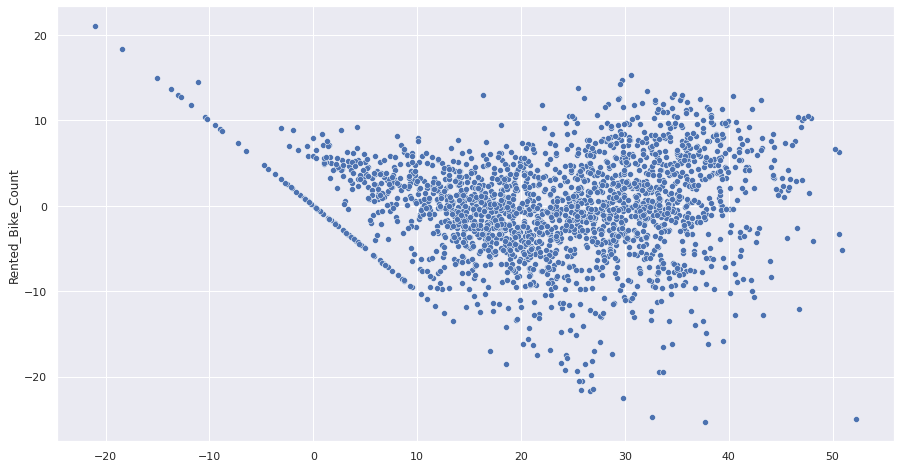

In [82]:
# plotting a scatter plot to visualize the heteroscadisticity
sns.set()
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_test_predict, y=(y_test - y_test_predict))

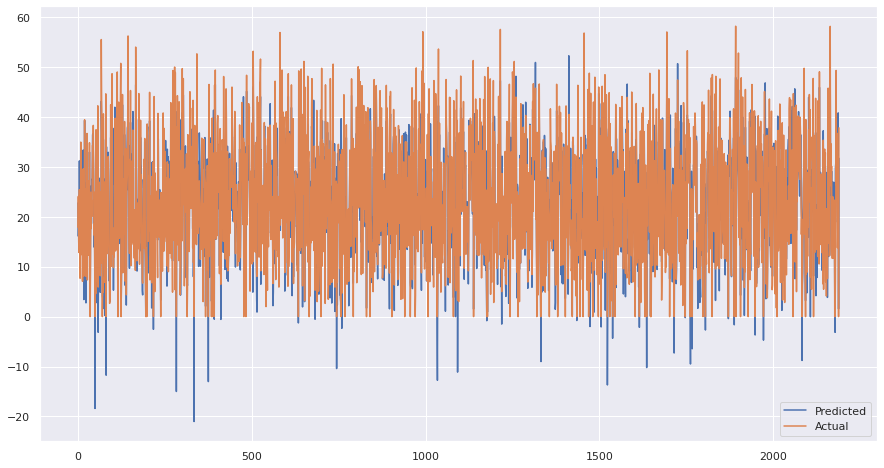

In [83]:
# Plotting the Lineplot to visualize the residuals
plt.figure(figsize=(15, 8))
plt.plot(y_test_predict)
plt.plot(np.array(y_test))
plt.legend(['Predicted', 'Actual'])
plt.show()

## Ridge Regression (L2 Regularization)

In [84]:
# Creating an object of Ridge regression model with alpha = 1
ridge = Ridge(alpha=1)

In [85]:
# Fitting the training data to ridge model
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [86]:
# Checking the accuracy score
ridge.score(X_train, y_train)

0.7722100936499625

In [87]:
# Predicting the values for training and testing data
y_train_predict_ridge = ridge.predict(X_train)
y_test_predict_ridge = ridge.predict(X_test)

In [88]:
# Claculating Errors values for taining

# Mean Square Error
MSE = mean_squared_error(y_train, y_train_predict_ridge)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_train, y_train_predict_ridge)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_train, y_train_predict_ridge)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  35.07752230235958
Root Mean Square Error (RMSE) :  5.922627989529612
Mean Absulute Error (MAE) :  4.474085382910331
R2 Score :  0.7722100936499625


**On Training Data, r2_score is 0.77 which is close to 1, it means our model is performing well on training data. Now try to test on testing dataset.**

In [89]:
# Claculating Errors values for testing

# Mean Square Error
MSE = mean_squared_error(y_test, y_test_predict_ridge)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_test_predict_ridge)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_test, y_test_predict_ridge)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  33.27663692231535
Root Mean Square Error (RMSE) :  5.768590549026283
Mean Absulute Error (MAE) :  4.41028503807013
R2 Score :  0.78934358054839


**By using Ridge regression, our model have performed little bit better as we can see r2_score is 0.78. Now visualize the residuals and heteroscadasticity.**

<Axes: ylabel='Rented_Bike_Count'>

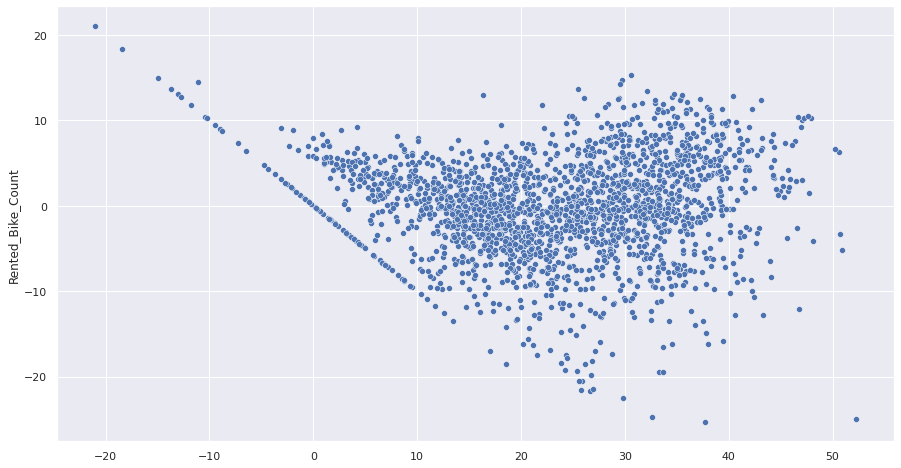

In [90]:
# plotting a scatter plot to visualize the heteroscadisticity
sns.set()
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_test_predict_ridge, y=(y_test - y_test_predict_ridge))

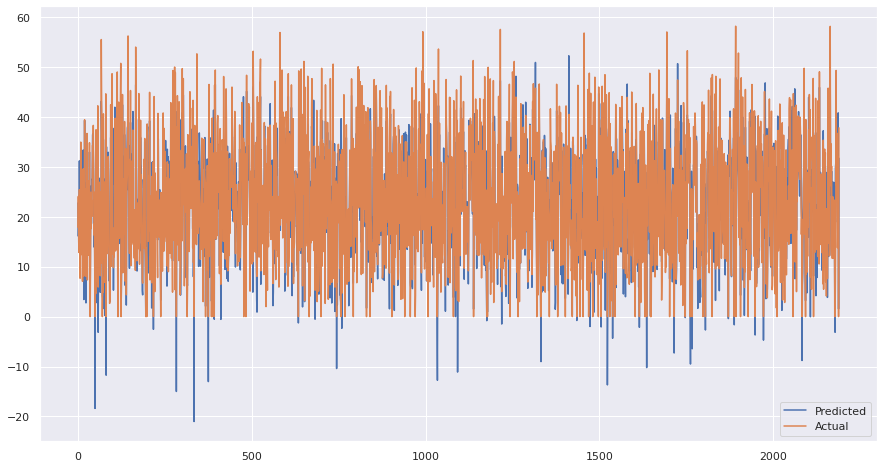

In [91]:
# Plotting the Lineplot to visualize the residuals
plt.figure(figsize=(15, 8))
plt.plot(y_test_predict_ridge)
plt.plot(np.array(y_test))
plt.legend(['Predicted', 'Actual'])
plt.show()

## Lasso Regression (L1 Regularization)

In [92]:
# Creating an object of Lasso regression model with alpha = 0.1 and maximum iteration 5000
lasso = Lasso(alpha=0.1, max_iter=5000)

In [93]:
# Fitting the training data to lasso model
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=5000)

In [94]:
# Checking the accuracy score
lasso.score(X_train, y_train)

0.7686560194416563

In [95]:
# Predicting the values for training and testing data
y_train_predict_lasso = lasso.predict(X_train)
y_test_predict_lasso = lasso.predict(X_test)

In [96]:
# Claculating Errors values for training

# Mean Square Error
MSE = mean_squared_error(y_train, y_train_predict_lasso)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_train, y_train_predict_lasso)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_train, y_train_predict_lasso)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  35.624816602197996
Root Mean Square Error (RMSE) :  5.96865282975966
Mean Absulute Error (MAE) :  4.514774434335246
R2 Score :  0.7686560194416563


**On Training Data, r2_score is 0.76 which is close to 1, it means our model is performing well on training data. Now try to test on testing dataset.**

In [97]:
# Claculating Errors values for testing

# Mean Square Error
MSE = mean_squared_error(y_test, y_test_predict_lasso)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_test_predict_lasso)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_test, y_test_predict_lasso)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  33.87405315907444
Root Mean Square Error (RMSE) :  5.820142022242623
Mean Absulute Error (MAE) :  4.457706017227814
R2 Score :  0.785561660949612


**By using Lasso regression, our model have performed little bit better as we can see r2_score is 0.78. Now visualize the residuals and heteroscadasticity.**

<Axes: ylabel='Rented_Bike_Count'>

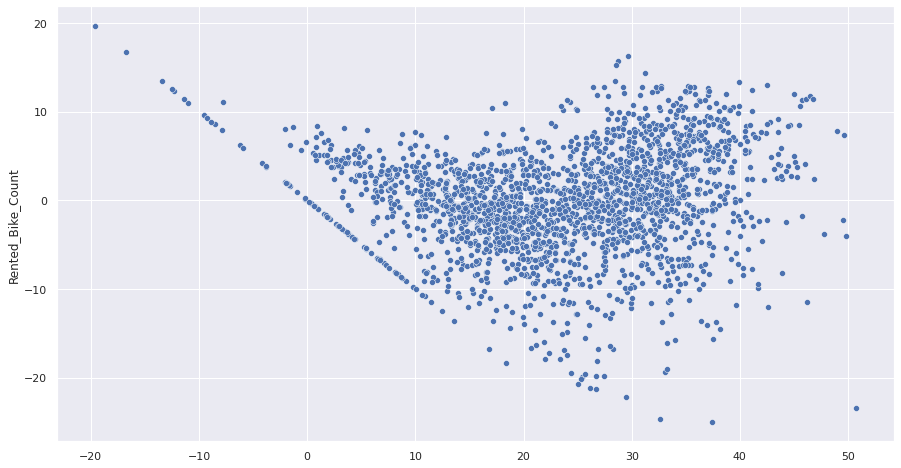

In [98]:
# plotting a scatter plot to visualize the heteroscadisticity
sns.set()
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_test_predict_lasso, y=(y_test - y_test_predict_lasso))

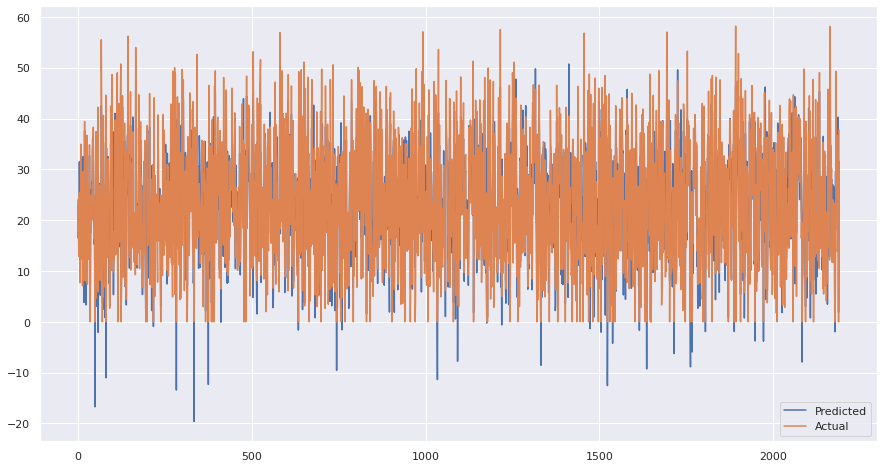

In [99]:
# Plotting the Lineplot to visualize the residuals
plt.figure(figsize=(15, 8))
plt.plot(y_test_predict_lasso)
plt.plot(np.array(y_test))
plt.legend(['Predicted', 'Actual'])
plt.show()

## ElasticNet Regression

In [100]:
# Creating an object of ElasticNet regression model with alpha = 0.1 and l1_ratio = 0.7
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.7)

In [101]:
# Fitting the training data to elasticnet model
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.7)

In [102]:
# Checking the accuracy
elasticnet.score(X_train, y_train)

0.7680762945640771

In [103]:
# Predicting the values for training and testing data
y_train_predict_elasticnet = elasticnet.predict(X_train)
y_test_predict_elasticnet = elasticnet.predict(X_test)

In [104]:
# Claculating Errors values for training

# Mean Square Error
MSE = mean_squared_error(y_train, y_train_predict_elasticnet)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_train, y_train_predict_elasticnet)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_train, y_train_predict_elasticnet)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  35.714088829612976
Root Mean Square Error (RMSE) :  5.976126574095714
Mean Absulute Error (MAE) :  4.531098100106854
R2 Score :  0.7680762945640771


**On Training Data, r2_score is 0.76 which is close to 1, it means our model is performing well on training data. Now try to test on testing dataset.**

In [105]:
# Claculating Errors values for testing

# Mean Square Error
MSE = mean_squared_error(y_test, y_test_predict_elasticnet)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_test_predict_elasticnet)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_test, y_test_predict_elasticnet)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  34.14204279014603
Root Mean Square Error (RMSE) :  5.843119268861969
Mean Absulute Error (MAE) :  4.4821264887616445
R2 Score :  0.78386516330583


**By using ElasticNet regression, our model have performed little bit better as we can see r2_score is 0.78. Now visualize the residuals and heteroscadasticity.**

<Axes: ylabel='Rented_Bike_Count'>

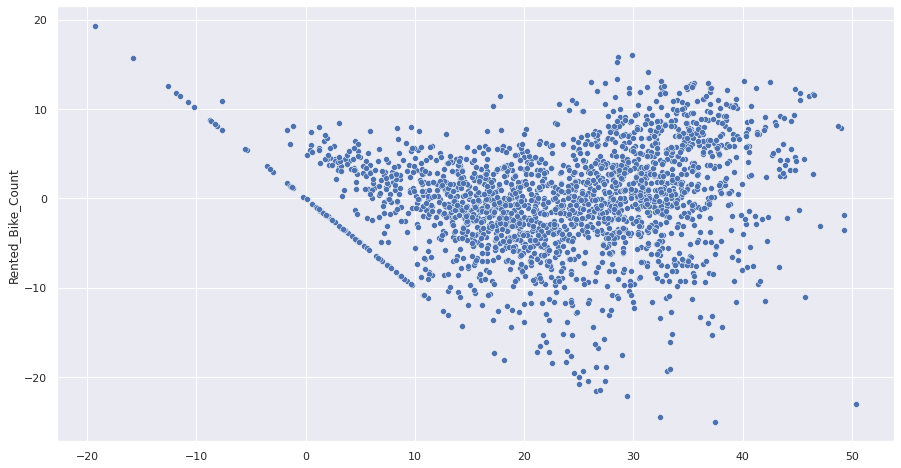

In [106]:
# plotting a scatter plot to visualize the heteroscadisticity
sns.set()
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_test_predict_elasticnet, y=(y_test - y_test_predict_elasticnet))

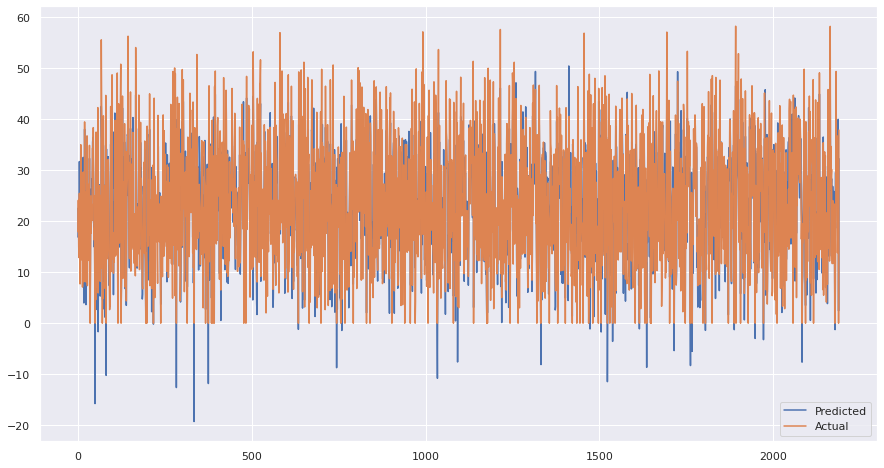

In [107]:
# Plotting the Lineplot to visualize the residuals
plt.figure(figsize=(15, 8))
plt.plot(y_test_predict_elasticnet)
plt.plot(np.array(y_test))
plt.legend(['Predicted', 'Actual'])
plt.show()

## RandomForest Regression

In [108]:
# Creating an object of RandomForest regression model
random_forest = RandomForestRegressor()

In [109]:
# Fitting the training data
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [110]:
# Checking the accuracy
random_forest.score(X_train, y_train)

0.9894699483543515

In [111]:
# Predicting the values for training and testing data
y_train_predict_rf = random_forest.predict(X_train)
y_test_predict_rf = random_forest.predict(X_test)

In [112]:
# Claculating Errors values for training

# Mean Square Error
MSE = mean_squared_error(y_train, y_train_predict_rf)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_train, y_train_predict_rf)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_train, y_train_predict_rf)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  1.6215298006999297
Root Mean Square Error (RMSE) :  1.2733930267988471
Mean Absulute Error (MAE) :  0.8051301676076138
R2 Score :  0.9894699483543515


**RandomForest is giving best performance as the MSE value is 1.6 almost equal to 0 and R2 Score is 0.98 very close to 1. Now try to test the model on testing data.**

In [113]:
# Claculating Errors values for testing

# Mean Square Error
MSE = mean_squared_error(y_test, y_test_predict_rf)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_test_predict_rf)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_test, y_test_predict_rf)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  12.691351763768145
Root Mean Square Error (RMSE) :  3.5624923528013563
Mean Absulute Error (MAE) :  2.209658608395902
R2 Score :  0.9196579051303285


**Hence we can conclude that RandomForest is performing best among all of the regression algoritm we have used. Now we will proceed with cross validation and hyperparameter tuning to improve its efficiency.**

<Axes: ylabel='Rented_Bike_Count'>

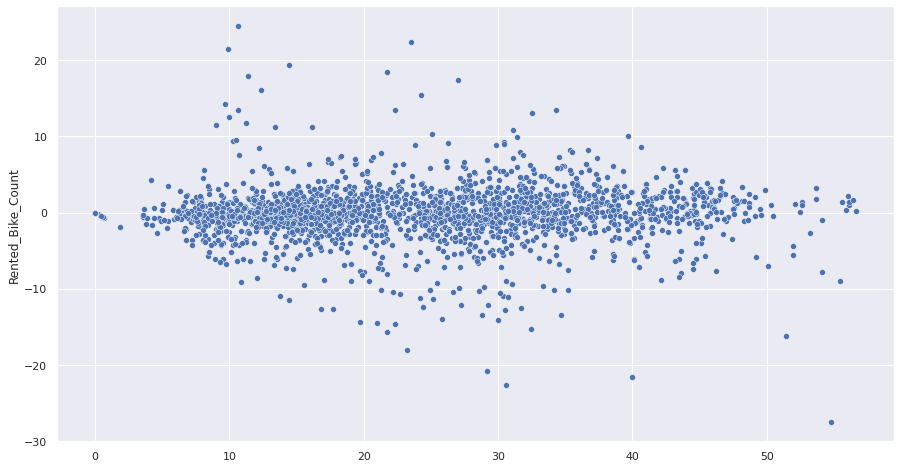

In [114]:
# plotting a scatter plot to visualize the heteroscadisticity
sns.set()
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_test_predict_rf, y=(y_test - y_test_predict_rf))

# Cross Validation and Hyperparameter Tuning

Machine learning is an iterative process.You will face choices about predictive variables to use, what types of models to use,what arguments to supply those models, etc. We make these choices in a data-driven way by measuring model quality of various alternatives. You've already learned to use train_test_split to split the data, so you can measure model quality on the test data. Cross-validation extends this approach to model scoring (or "model validation.") Compared to train_test_split, cross-validation gives you a more reliable measure of your model's quality, though it takes longer to run.

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. For example, we could have 5 folds or experiments. We divide the data into 5 pieces, each being 20% of the full dataset.

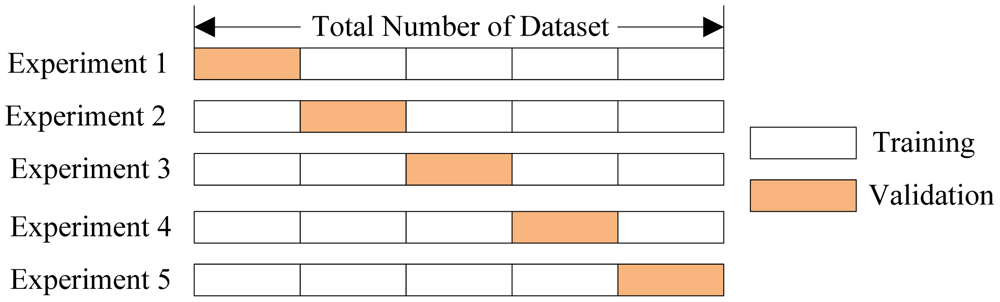

## Running Grid Search Cross Validation for Lasso Regression

In [117]:
# Cross Validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_reg = GridSearchCV(lasso, parameters, scoring='r2', cv=3)

In [118]:
# Fitting the training set
lasso_reg.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [120]:
print('The Best fit alpha values is : ', lasso_reg.best_params_)
print('Using ', lasso_reg.best_params_ , ', the R2 Score is : ', lasso_reg.best_score_)

The Best fit alpha values is :  {'alpha': 0.001}
Using  {'alpha': 0.001} , the R2 Score is :  0.7684031184706078


In [121]:
# Predicting the test dataset
y_pred_lasso = lasso_reg.predict(X_test)

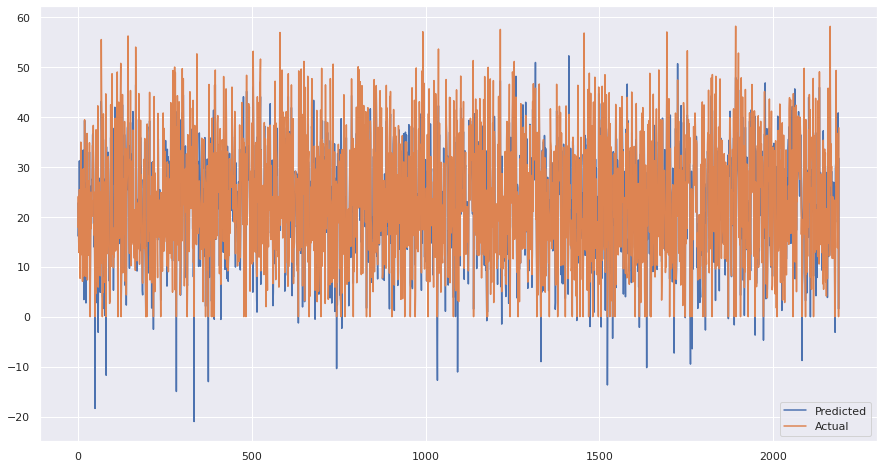

In [122]:
# Plotting the Lineplot to visualize the residuals
plt.figure(figsize=(15, 8))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(['Predicted', 'Actual'])
plt.show()

In [123]:
# Claculating Errors values for testing

# Mean Square Error
MSE = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_pred_lasso)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_test, y_pred_lasso)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  33.276209224186296
Root Mean Square Error (RMSE) :  5.768553477622124
Mean Absulute Error (MAE) :  4.410166004099231
R2 Score :  0.7893462880742943


**Using GridSearchCV, the value of R2 Score has increased. Therefore, we can considered that our model's performance has increased.**

**Before R2 Score for Lasso : 0.7855**
**After R2 Score for Lasso : 0.7893**

## Running Grid Search Cross Validation for Ridge Regression

In [124]:
# Cross Validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_reg = GridSearchCV(ridge, parameters, cv=3, scoring='r2')

In [125]:
# Fitting the training dataset
ridge_reg.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='r2')

In [126]:
print('The Best fit alpha values is : ', ridge_reg.best_params_)
print('Using ', ridge_reg.best_params_ , ', the R2 Score is : ', ridge_reg.best_score_)

The Best fit alpha values is :  {'alpha': 10}
Using  {'alpha': 10} , the R2 Score is :  0.7684170617749423


In [127]:
# Predicting on test dataset
y_pred_ridge = ridge_reg.predict(X_test)

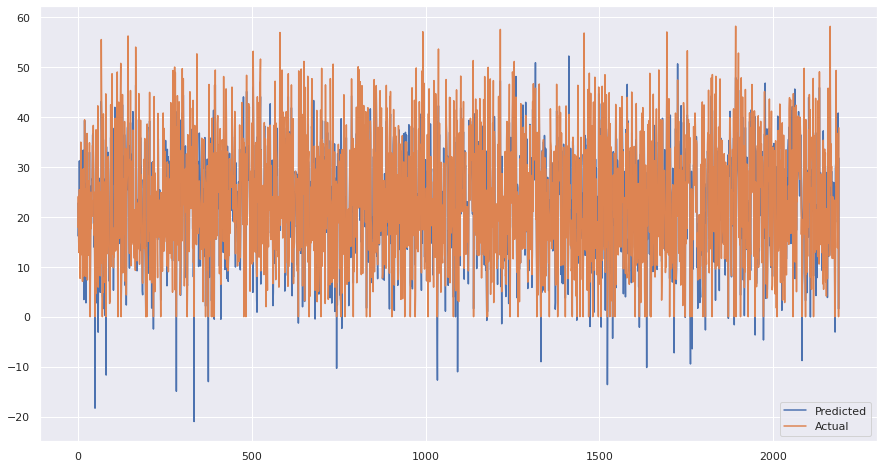

In [128]:
# Plotting the Lineplot to visualize the residuals
plt.figure(figsize=(15, 8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(['Predicted', 'Actual'])
plt.show()

In [129]:
# Claculating Errors values for testing

# Mean Square Error
MSE = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_test, y_pred_ridge)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  33.289046682617254
Root Mean Square Error (RMSE) :  5.769666080685888
Mean Absulute Error (MAE) :  4.411305418312488
R2 Score :  0.7892650210570101


**As we can see there is no effect on Ridge of GridSearchCV, it means our ridge model is already performing its best.**

## Running Grid Search Cross Validation for ElasticNet Regression

In [130]:
# Cross Validation
elasticnet = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elasticnet_reg = GridSearchCV(elasticnet, parameters, scoring='r2',cv=5)

In [131]:
# Fitting the model
elasticnet_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='r2')

In [132]:
print('The Best fit alpha values is : ', elasticnet_reg.best_params_)
print('Using ', elasticnet_reg.best_params_ , ', the R2 Score is : ', elasticnet_reg.best_score_)

The Best fit alpha values is :  {'alpha': 0.01, 'l1_ratio': 0.8}
Using  {'alpha': 0.01, 'l1_ratio': 0.8} , the R2 Score is :  0.7675467069278042


In [133]:
# Predicting the test dataset
y_pred_elasticnet = elasticnet_reg.predict(X_test)

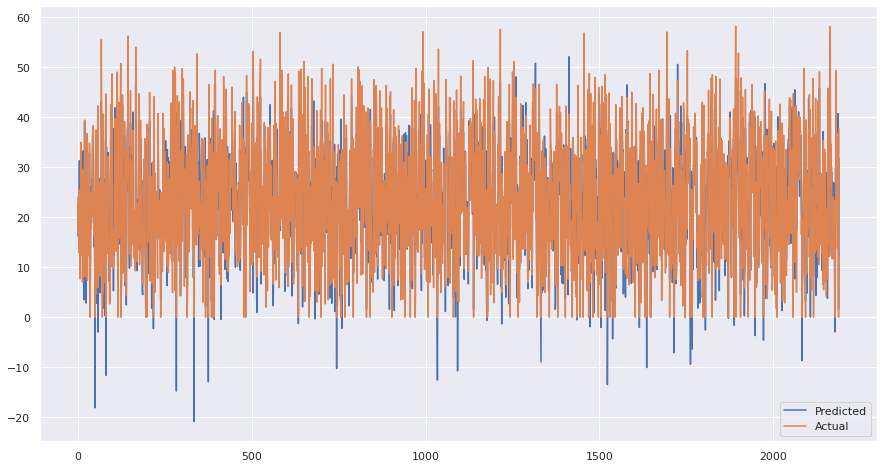

In [134]:
# Plotting the Lineplot to visualize the residuals
plt.figure(figsize=(15, 8))
plt.plot(y_pred_elasticnet)
plt.plot(np.array(y_test))
plt.legend(['Predicted', 'Actual'])
plt.show()

In [135]:
# Claculating Errors values for testing

# Mean Square Error
MSE = mean_squared_error(y_test, y_pred_elasticnet)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_pred_elasticnet)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_test, y_pred_elasticnet)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  33.30551825703942
Root Mean Square Error (RMSE) :  5.771093332899704
Mean Absulute Error (MAE) :  4.412070056234412
R2 Score :  0.7891607484137558


**In ElasticNet the model the R2 Score id 0.7891 after using GridSearchCV and before the R2 Score was 0.7838. So we can say our model is somehow improved.**

## Running Grid Search Cross Validation for RandomForest Regression

In [136]:
# HYperparameter Grid
parameters = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
             'max_depth' : [10,15,20],
             'min_samples_split':[2,4],
             'min_samples_leaf':[1,2],
             'bootstrap' : [True,False]
             }

In [137]:
# Cross Validation
random_forest = RandomForestRegressor()
rf_reg = GridSearchCV(random_forest, param_grid=parameters, cv=5, scoring='r2')

In [138]:
# Fitting the model
rf_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 12, 15, 17, 20]},
             scoring='r2')

In [139]:
print('The Best fit alpha values is : ', rf_reg.best_params_)
print('Using ', rf_reg.best_params_ , ', the neg_mean_squared_error is : ', rf_reg.best_score_)

The Best fit alpha values is :  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}
Using  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20} , the neg_mean_squared_error is :  0.9123925733839192


In [140]:
# Predicting the test dataset
y_pred_rf = rf_reg.predict(X_test)

In [141]:
y_pred_rf_train = rf_reg.predict(X_train)

In [142]:
# Claculating Errors values for testing

# Mean Square Error
MSE = mean_squared_error(y_train, y_pred_rf_train)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_train, y_pred_rf_train)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_train, y_pred_rf_train)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  3.846414962502582
Root Mean Square Error (RMSE) :  1.9612279221198596
Mean Absulute Error (MAE) :  1.2601933122044477
R2 Score :  0.9750217675997912


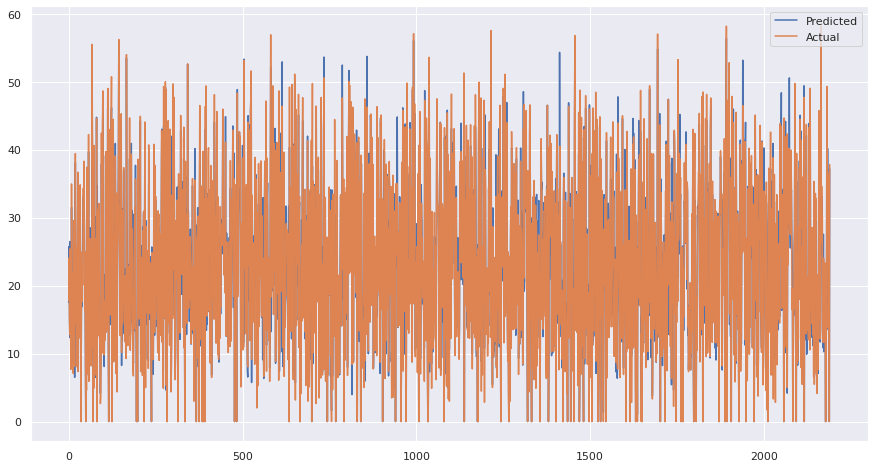

In [143]:
# Plotting the Lineplot to visualize the residuals
plt.figure(figsize=(15, 8))
plt.plot(y_pred_rf)
plt.plot(np.array(y_test))
plt.legend(['Predicted', 'Actual'])
plt.show()

In [144]:
# Claculating Errors values for testing

# Mean Square Error
MSE = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (MSE) : ", MSE)

# Root Mean Square Error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE) : ", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absulute Error (MAE) : ", MAE)

# R2 Score
R2_Score = r2_score(y_test, y_pred_rf)
print("R2 Score : ", R2_Score)

Mean Squared Error (MSE) :  13.790944722438693
Root Mean Square Error (RMSE) :  3.7136161248086337
Mean Absulute Error (MAE) :  2.3385172038928648
R2 Score :  0.9126969758733097


**As we can see that the random forest is giving the 0.97 R2 Score on training dataset and 0.91 R2 Score on test dataset.**

<Axes: ylabel='Rented_Bike_Count'>

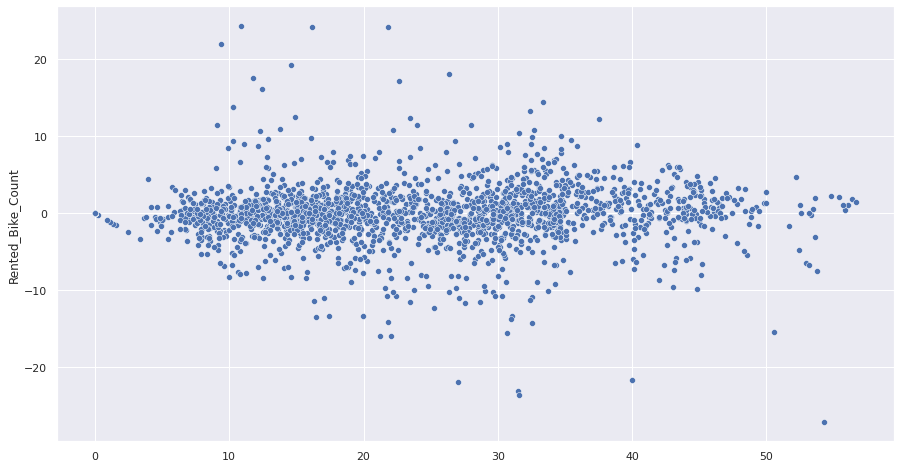

In [145]:
# plotting a scatter plot to visualize the heteroscadisticity
sns.set()
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_pred_rf, y=(y_test - y_pred_rf))

# Conclusion

**EDA Conclusion :**



*   The number of renting bikes increases as summer season starts.
*   The number of renting bikes decreses as winter season starts.
*   In summer, 37% people prefer to rent a bike and in winters, only 7.9% people prefer to rent a bike.
*   Most number of people prefer to rent a bike when the temperature of the day is in between 15 degree to 30 degree celcius.
*   When humidity percentage is in between 30 to 70, people prefer to rent a bike.
*   Most of the bikes are rented when sky is shiny or there is no rainfall or snowfall.
*   Majority of the bikes are rented on a functioning day. On holiday majority of people prefer to stay home.
*   When there is a functioning day, most of the bikes are rented during daytime. The peak hour of renting bike is 6 PM evening. The second highest peak hour of renting a bike is 8 AM morning.
*   The lowest number of bikes are rented around 4 AM and 5 AM.


**ML models Conclusion :**

*   **Random Forest algorithm gave the best performance among all of the models applied.**

Before Cross Validation :

> R2 Score on train dataset : 0.98

> R2 Score on test dataset : 0.91

After Cross Validation :


> R2 Score on train dataset : 0.97

> R2 Score on test dataset : 0.91

**No Overfitting is seen.**






*   The Linear and Ridge regression both shows the 77% accuracy on training dataset. On test dataset, Linear Regression shows 77% accuracy and Ridge Regression shows 78% accuracy.

*   The Lasso and ElasticNet Regression both shows 76% accuracy on training dataset and 78% accuracy on test dataset.

* After doing cross validation on Lasso, Ridge and ElasticNet regression, the accuracy for all of them remain same on test dataset. This shows no overfitting.


However this is not the best models, maybe there are some more algorithm that may perform well than those that I have applied. Also, this is not end as this data is time dependent and values for may independent variables like temperature, wind_speed etc, will not be contant. Therefore, there might be chances where this model will not perform well.

As we know that, the machine learning is an evolving field. So we all need to be prepared for all the data drifts and keep an eye on our model and keep checking it from time to time. In this field, keep practicing and gather knowledge will surely will make us a step head.

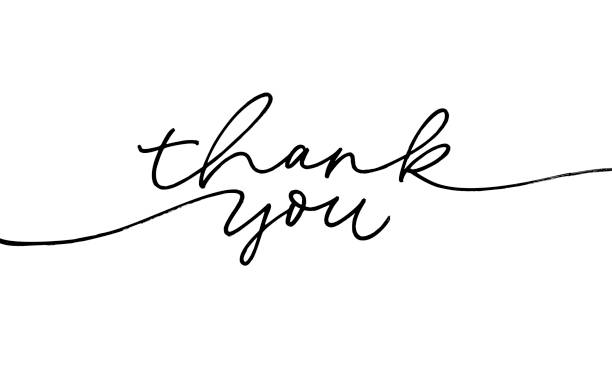